## STARBUCKS CUSTOMER SEGMENTATION

Starbucks at a Glance:
Starbucks is a leading U.S.–based coffeehouse company with a massive global presence. As of 2023, it operates over 30,000 retail stores across more than 80 countries 

Starbucks Rewards: Driving Customer Loyalty
- The Starbucks Rewards program, launched in 2009, has grown to become a significant competitive edge.
- It currently boasts approx. 34 million active U.S. members —a key segment generating higher engagement.
- Reward members visit Starbucks 5.6× more often than non-members and spend 2.5× more per visit.
- According to recent data, member retention sits at 44%, roughly double the industry average of 22%.


## 1. PROJECT OVERVIEW

The motivation behind this project is to propose a solution that helps the company in forming a better understanding of its customers base. In this project, an unsupervised learning technique will be used to segment customers and measure how each segment behave during different periods of the test. In particular, K-Means clustering will be used. The provided dataset of courses will go through different phases at first before being ready for modeling. Starting with cleaning and ending with the final dataset grouped by customer profiles with their data aggreated.

Here's a high-level overview of the workflow followed in this project:

- Define the problem in-hands and measurement criterias.
- Explore, understand, and clean the provided datasets.
- Prepare final dataset grouped by customers.
- Transform final dataset appropriately before fitting model.
- Fit model on final dataset and predict cluster labels.
- Explore distributions among formed clusters.
- Discuss outcomes and make recommendations.

## 1.1 PROBLEM STATEMENT

While past system upgrades—like mobile ordering, personalized offers, and AI-driven incentives—have successfully boosted engagement and revenue, the company still treats all customers the same initially, missing out on deeper personalization. By applying unsupervised learning (e.g., K‑means clustering) to transaction and engagement data, this project can reveal distinct customer segments and tailor marketing offers more effectively, reducing campaign waste, maximizing revenue, and filling the personalization gap left by current broad-based promotions.

## 1.2 MEASUREMENT CRITERIAS

When speaking about measurement criterias, two categories come to mind; business metrics which assist in making decisions from a business point of view, and technical metrics which assist in making assessment of the implementation of the algorithm used to cluster data.

1.2.1. BUSINESS METRICS:
-Identify which customers react preferably to which types of offers. To measure this, offer view and completion rates will be used where the cardinalities of corresponding sets are divided by cardinalities of relevant sets.





1.3.1. TECHNICAL METRICS:
For the algorithm chosen in this problem, K-Means, two appropriate methods will be used find the optimal number of clusters 
and to assess the model implementations; silhouette coefficient (SC) analysis and within-cluster Sum of Squared Errors (SSE) analysis.







In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json
import warnings
warnings.filterwarnings('ignore')

## 2. DATA UNDERSTANDING

This data set contains simulated data that mimics customer behavior on the Starbucks Rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink (informational) or an actual offer such as a discount or BOGO (buy one get one free). This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

The data is contained in three files mentioned below in brief and will be discussed in details later.
- PORTFOLIO DATASET- containing meta data about the promotions offered by the company.
- PROFILE DATASET- demographic data about members enrolled in the reward program.
- TRANSCRIPT DATASET- records for transactions, offers received, offers viewed, and offers completed.

In [2]:
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

## 2.1 PORTFOLIO DATASET

SCHEMA:
- offer_id -unique identify of all the 10 types of offers that are publicized
- offer_type -type of offer; bogo, discount, or informational
- difficulty -minimum required to be spent to complete an offer
- reward -reward given for completing an offer
- duration -time in days for an offer to be open
- channels -communication channels used to market an offer.

In [3]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


## 2.2 PROFILE DATASET

SCHEMA:

- age- age of the customer
- became_member_on- date when customer created an app account
- gender- gender of the customer; M, F, or O.
- id- customer id
- income- income of customer

In [4]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


## 2.3 TRANSCRIPT DATASET

SCHEMA:

- event- record description; transaction, offer received, offer viewed, or offer completed.
- person- customer id.
- time- time in hours since start of test. The data begins at time t=0.
- value- either an offer id or transaction amount depending on the record.

In [5]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


## 3. DATA PREPARATION

In this section, different compantions of techniques will be performed to produce the final dataset ready for modeling next section. Starting with cleaning the provided datasets, and then merging and aggregating data to form the final dataset. The final dataset will be grouped by customers profiles. 

In [6]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [7]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [8]:
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [9]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [10]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [11]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [12]:
profile[profile['gender'].isnull()==True]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [13]:
profile[profile['income'].isnull()==True]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [14]:
profile[profile['income'].isnull()==True]['gender'].isnull().sum()

2175

In [15]:
profile[profile['income'].isnull()==True]['age'].value_counts()

age
118    2175
Name: count, dtype: int64

In [16]:
profile['age'].unique()

array([118,  55,  75,  68,  65,  58,  61,  26,  62,  49,  57,  40,  64,
        78,  42,  56,  33,  46,  59,  67,  53,  22,  96,  69,  20,  45,
        54,  39,  41,  79,  66,  29,  44,  63,  36,  76,  77,  30,  51,
        27,  73,  74,  70,  89,  50,  90,  60,  19,  72,  52,  18,  71,
        83,  43,  47,  32,  38,  34,  85,  48,  35,  82,  21,  24,  81,
        25,  37,  23, 100,  28,  84,  80,  87,  86,  94,  31,  88,  95,
        93,  91,  92,  98, 101,  97,  99], dtype=int64)

In [17]:
profile[profile['age']>=100]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


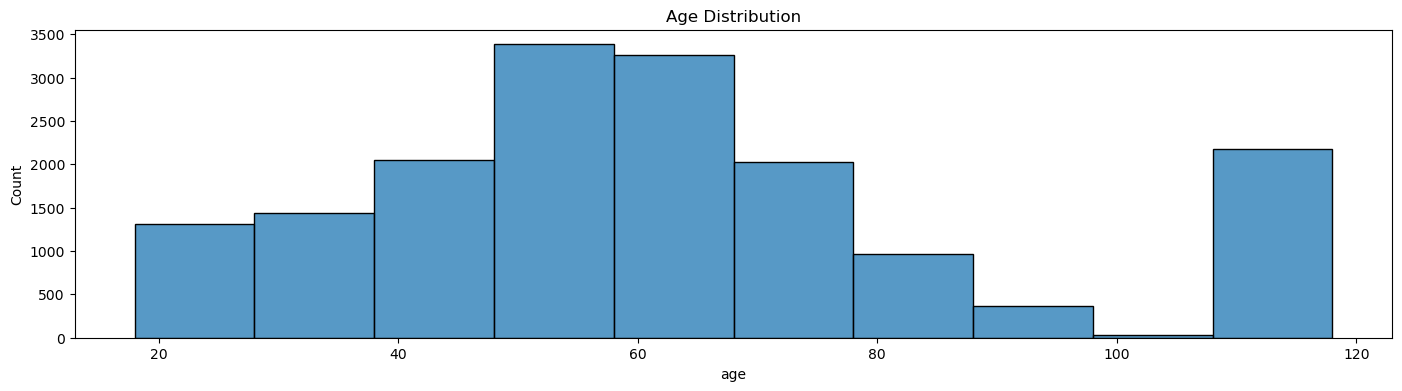

In [18]:
plt.figure(figsize=(17,4))
sns.histplot(data=profile,x='age',bins=10)
plt.title('Age Distribution')
plt.show()

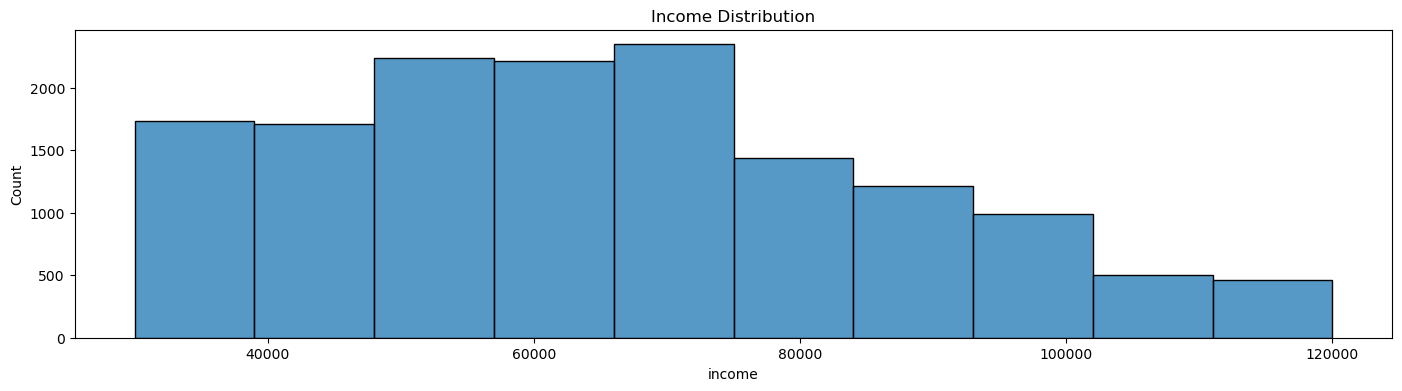

In [19]:
plt.figure(figsize=(17,4))
sns.histplot(data=profile,x='income',bins=10)
plt.title('Income Distribution')
plt.show()

In [20]:
profile[profile['income'].isnull()==True]['gender'].value_counts()

Series([], Name: count, dtype: int64)

In [21]:
profile['gender'].value_counts()

gender
M    8484
F    6129
O     212
Name: count, dtype: int64

In [22]:
profile[profile['gender']=='O']

,gender,age,id,became_member_on,income
31,O,53,d1ede868e29245ea91818a903fec04c6,20170916,52000.0
273,O,60,d0be9ff460964c3398a33ad9b2829f3a,20180216,94000.0
383,O,49,0d0a9ca9281248a8a35806c9ae68f872,20171207,42000.0
513,O,63,01f46a5191424005af436cdf48a5da7c,20150920,89000.0
576,O,73,644ac06dc9b34a5bbd237a465cf47571,20180316,88000.0
...,...,...,...,...,...
16670,O,76,e8926849bbe24ce488d4f3fcd3b537e8,20180320,52000.0
16683,O,49,1f68e9b6850f49348235a281a47d9f15,20170607,56000.0
16731,O,51,a97208c5be42445d9949e82e0f70f622,20160707,55000.0
16741,O,56,994b6ef7a8ca46e3b379518399f6ec93,20180221,52000.0


In [23]:
profile.shape

(17000, 5)

In [24]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [25]:
transcript.shape

(306534, 4)

In [26]:
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [27]:
transcript['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

In [28]:
transcript[transcript['event']=='transaction'].values

array([['02c083884c7d45b39cc68e1314fec56c', 'transaction',
        {'amount': 0.8300000000000001}, 0],
       ['9fa9ae8f57894cc9a3b8a9bbe0fc1b2f', 'transaction',
        {'amount': 34.56}, 0],
       ['54890f68699049c2a04d415abc25e717', 'transaction',
        {'amount': 13.23}, 0],
       ...,
       ['a00058cf10334a308c68e7631c529907', 'transaction',
        {'amount': 3.61}, 714],
       ['76ddbd6576844afe811f1a3c0fbb5bec', 'transaction',
        {'amount': 3.5300000000000002}, 714],
       ['c02b10e8752c4d8e9b73f918558531f7', 'transaction',
        {'amount': 4.05}, 714]], dtype=object)

In [29]:
transcript[transcript['event']=='offer received'].values

array([['78afa995795e4d85b5d9ceeca43f5fef', 'offer received',
        {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}, 0],
       ['a03223e636434f42ac4c3df47e8bac43', 'offer received',
        {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}, 0],
       ['e2127556f4f64592b11af22de27a7932', 'offer received',
        {'offer id': '2906b810c7d4411798c6938adc9daaa5'}, 0],
       ...,
       ['6d5f3a774f3d4714ab0c092238f3a1d7', 'offer received',
        {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}, 576],
       ['9dc1421481194dcd9400aec7c9ae6366', 'offer received',
        {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}, 576],
       ['e4052622e5ba45a8b96b59aba68cf068', 'offer received',
        {'offer id': '3f207df678b143eea3cee63160fa8bed'}, 576]],
      dtype=object)

In [30]:
transcript[transcript['event']=='offer viewed'].values

array([['389bc3fa690240e798340f5a15918d5c', 'offer viewed',
        {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}, 0],
       ['d1ede868e29245ea91818a903fec04c6', 'offer viewed',
        {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}, 0],
       ['102e9454054946fda62242d2e176fdce', 'offer viewed',
        {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}, 0],
       ...,
       ['84fb57a7fe8045a8bf6236738ee73a0f', 'offer viewed',
        {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}, 714],
       ['abc4359eb34e4e2ca2349da2ddf771b6', 'offer viewed',
        {'offer id': '3f207df678b143eea3cee63160fa8bed'}, 714],
       ['8dda575c2a1d44b9ac8e8b07b93d1f8e', 'offer viewed',
        {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}, 714]],
      dtype=object)

In [31]:
transcript[transcript['event']=='offer completed'].values

array([['9fa9ae8f57894cc9a3b8a9bbe0fc1b2f', 'offer completed',
        {'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}, 0],
       ['fe97aa22dd3e48c8b143116a8403dd52', 'offer completed',
        {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}, 0],
       ['629fc02d56414d91bca360decdfa9288', 'offer completed',
        {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}, 0],
       ...,
       ['b895c57e8cd047a8872ce02aa54759d6', 'offer completed',
        {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2},
        714],
       ['8431c16f8e1d440880db371a68f82dd0', 'offer completed',
        {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2},
        714],
       ['24f56b5e1849462093931b164eb803b5', 'offer completed',
        {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2},
        714]], dtype=object)

In [32]:
transcript['person'].nunique()

17000

In [33]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [34]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [35]:
transcript.sample(15)

,person,event,value,time
11802,dadae228edc442d59471e7e8d42e1d9e,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
135980,fb8ae29d5f8a46b081792000b3c833de,transaction,{'amount': 3.86},360
35429,1edf94daffb04923b77056e7d3791a6c,transaction,{'amount': 1.73},66
272702,4409c9f2144b4599b4a8cffba0dc903f,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},600
204475,5f1b9037df3740af9f300d987513af8f,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504
84279,1ac0142abefa459aa275aeb9410b6109,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},210
244881,83af4833e00143e19e212250ccaabcbb,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,570
61787,6637c362108d43b89e711ab4ec3b00f0,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},168
104745,5777ef0464bf44d79c451d29ed494a29,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},294
29698,f33fc79619c74e268db0fab6d9c04153,transaction,{'amount': 25.46},48


In [36]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [37]:
portfolio.rename(columns={'id':'offer_id','reward':'offered_reward'},inplace=True)

In [38]:
portfolio.head(5)

,offered_reward,channels,difficulty,duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [39]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [40]:
profile.rename(columns={'id':'customer_id'},inplace=True)

In [41]:
profile['became_member_on']=pd.to_datetime(profile['became_member_on'],format='%Y%m%d')

In [42]:
profile

,gender,age,customer_id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


In [43]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               17000 non-null  int64         
 2   customer_id       17000 non-null  object        
 3   became_member_on  17000 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 664.2+ KB


In [44]:
profile['days_member'] = (pd.to_datetime('today') - profile['became_member_on']) / np.timedelta64(1, 'D')

In [45]:
profile['days_member']=profile['days_member'].astype(int)

In [46]:
profile.drop(columns=['became_member_on'],inplace=True)

In [47]:
profile

,gender,age,customer_id,income,days_member
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,NaN,3068
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2915
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,NaN,2553
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2982
4,None,118,a03223e636434f42ac4c3df47e8bac43,NaN,2895
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,2591
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,2552
16997,M,49,01d26f638c274aa0b965d24cefe3183f,73000.0,3085
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,3410


In [48]:
profile.isnull().sum()

gender         2175
age               0
customer_id       0
income         2175
days_member       0
dtype: int64

In [49]:
profile[profile['gender']=='O'].shape[0]

212

In [50]:
profile.sample(25)

,gender,age,customer_id,income,days_member
12248,M,63,f2ac47ad6a874a10b85490a42cb23d76,89000.0,2842
4290,F,65,88c7a3b182be47a29cd928be5ffd1fe8,84000.0,3262
4800,F,60,47cdb6b555e44e2a90c6321d35186ac6,118000.0,3062
1348,F,48,2d5b8dfaa968465b89949bc63fd0cf6b,93000.0,3617
5341,F,62,83050d3e8f1841469a596565018383f1,120000.0,3081
13471,M,33,d56d701948d7473d80c0583ca8221eef,60000.0,3029
7944,M,54,7b7f2e6d79f8480a9872535c492adec9,69000.0,3000
12640,M,64,07bdb81f215b4ef19653675c6eb2c447,76000.0,2901
414,M,71,3f297d8938564fdbbcd73db63bc8ce54,67000.0,3773
13294,F,60,65824e7a3bd14f29a344c0a9f3f47e8d,55000.0,2737


In [51]:
dropped_profile=profile[(profile['gender'].isnull()== True) | (profile['gender']=='O')]
dropped_profile

,gender,age,customer_id,income,days_member
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,NaN,3068
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,NaN,2553
4,None,118,a03223e636434f42ac4c3df47e8bac43,NaN,2895
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,2843
7,None,118,68617ca6246f4fbc85e91a2a49552598,NaN,2836
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,NaN,3232
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,NaN,3371
16989,None,118,ca45ee1883624304bac1e4c8a114f045,NaN,2682
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,NaN,3461


In [52]:
dropped_profile.index

Index([    0,     2,     4,     6,     7,     9,    10,    11,    17,    23,
       ...
       16942, 16951, 16953, 16969, 16977, 16980, 16982, 16989, 16991, 16994],
      dtype='int64', length=2387)

In [53]:
profile.index

RangeIndex(start=0, stop=17000, step=1)

In [54]:
profile.drop(dropped_profile.index,inplace=True)

In [55]:
profile.shape

(14613, 5)

In [56]:
profile.reset_index(drop=True,inplace=True)

In [57]:
profile.head()

,gender,age,customer_id,income,days_member
0,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2915
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2982
2,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2630
3,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2706
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2796


In [58]:
profile['gender']= profile['gender'].map({'F':0,'M':1})
profile['gender']

0        0
1        0
2        1
3        1
4        1
        ..
14608    0
14609    1
14610    1
14611    0
14612    0
Name: gender, Length: 14613, dtype: int64

In [59]:
profile

,gender,age,customer_id,income,days_member
0,0,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2915
1,0,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2982
2,1,68,e2127556f4f64592b11af22de27a7932,70000.0,2630
3,1,65,389bc3fa690240e798340f5a15918d5c,53000.0,2706
4,1,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2796
...,...,...,...,...,...
14608,0,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,2591
14609,1,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,2552
14610,1,49,01d26f638c274aa0b965d24cefe3183f,73000.0,3085
14611,0,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,3410


In [60]:
profile.isnull().sum()

gender         0
age            0
customer_id    0
income         0
days_member    0
dtype: int64

In [61]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [62]:
transcript.rename(columns={'person': 'customer_id'}, inplace=True)

In [63]:
transcript=transcript[transcript['customer_id'].isin(dropped_profile['customer_id'])==False]

In [64]:
transcript['value_type']=transcript['value'].apply(lambda x:list(x.keys())[0])
transcript['actual_value']=transcript['value'].apply(lambda x:list(x.values())[0])
transcript.drop(columns=['value'],inplace=True)

In [65]:
transcript

,customer_id,event,time,value_type,actual_value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5
5,389bc3fa690240e798340f5a15918d5c,offer received,0,offer id,f19421c1d4aa40978ebb69ca19b0e20d
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,offer id,3f207df678b143eea3cee63160fa8bed
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
...,...,...,...,...,...
306527,24f56b5e1849462093931b164eb803b5,offer completed,714,offer_id,fafdcd668e3743c1bb461111dcafc2a4
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,amount,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,amount,3.61


In [66]:
offers_df = transcript[transcript['event'] != 'transaction']
transactions_df = transcript[transcript['event'] == 'transaction']

In [67]:
offers_df.rename(columns={'actual_value': 'offer_id'}, inplace=True)
transactions_df.rename(columns={'actual_value': 'amount'}, inplace=True)

In [68]:
offers_df.drop(columns=['value_type'], inplace=True)
transactions_df.drop(columns=['value_type', 'event'], inplace=True)

In [69]:
offers_df

,customer_id,event,time,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5
5,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
...,...,...,...,...
306483,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,714,5a8bc65990b245e5a138643cd4eb9837
306490,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,714,3f207df678b143eea3cee63160fa8bed
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,714,0b1e1539f2cc45b7b9fa7c272da2e1d7
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4


In [70]:
transactions_df

,customer_id,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,34.56
12659,54890f68699049c2a04d415abc25e717,0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,0,18.97
...,...,...,...
306526,24f56b5e1849462093931b164eb803b5,714,22.64
306529,b3a1272bc9904337b331bf348c3e8c17,714,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,714,9.53
306531,a00058cf10334a308c68e7631c529907,714,3.61


In [71]:
offers_df.shape

(146615, 4)

In [72]:
offers_df=offers_df.merge(portfolio,on='offer_id')

In [73]:
offers_df

,customer_id,event,time,offer_id,offered_reward,channels,difficulty,duration,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo
1,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount
2,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,5,"[web, email, mobile, social]",5,5,bogo
3,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed,0,"[web, email, mobile]",0,4,informational
4,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"[web, email]",20,10,discount
...,...,...,...,...,...,...,...,...,...
146610,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,714,5a8bc65990b245e5a138643cd4eb9837,0,"[email, mobile, social]",0,3,informational
146611,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,714,3f207df678b143eea3cee63160fa8bed,0,"[web, email, mobile]",0,4,informational
146612,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,714,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"[web, email]",20,10,discount
146613,8431c16f8e1d440880db371a68f82dd0,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,2,"[web, email, mobile, social]",10,10,discount


In [74]:
offers_df['offer_id'].nunique()

10

In [75]:
received_df = offers_df[offers_df['event']=='offer received']
viewed_df = offers_df[offers_df['event']=='offer viewed']
completed_df = offers_df[offers_df['event']=='offer completed']

In [76]:
received_df.shape

(65585, 9)

In [77]:
viewed_df.shape

(49087, 9)

In [78]:
completed_df.shape

(31943, 9)

CONCLUSION:
Form the 3 given dataset, cleaned the data (checked if null values are present and removed, removed unnecessary columns, checked if duplicacy of data is there) and segmented it into 4 major dataset, that will be utilized as per requirement-

- PORTFOLIO DATASET
- PROFILE DATASET
- offers_df - futher segmented based on event type : offer viewed (viewed_df)/ offer completed (completed_df)/ offer received(completed_df)
- transaction_df

## 4. EXPLORATORY DATA ANALYSIS (EDA)

## 4.1 EDA on customer profile data

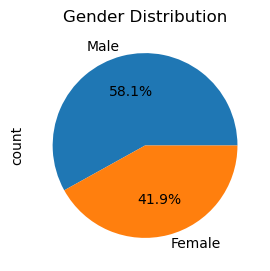

In [79]:
plt.figure(figsize=(5,3))
plt.title('Gender Distribution')
profile['gender'].value_counts().plot(kind='pie',autopct='%0.1f%%',labels=['Male','Female'])
plt.show()

 Observations: There are more males (58.1%) than females (41.9%) customers.

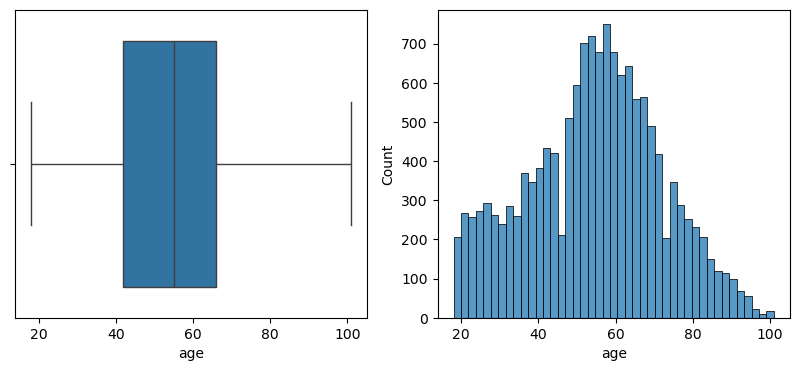

count    14613.000000
mean        54.393417
std         17.400201
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64

In [80]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
sns.boxplot(data=profile,x='age',ax=ax[0])
sns.histplot(data=profile,x='age',ax=ax[1])
plt.show()
profile['age'].describe()

Observations:
The youngest customer is 18 years old and the oldest is 101 years old.
The age of the customers roughly follows a normal distribution with the mean and the standard deviation equal to 54 and 17 respectively

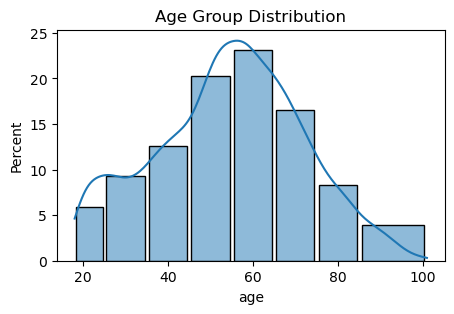

In [81]:
plt.figure(figsize=(5,3))
plt.title('Age Group Distribution')
sns.histplot(data=profile,x='age',bins=[18,25,35,45,55,65,75,85,101],stat='percent',shrink=0.9,kde=True)
plt.show()

Observations:
- The largest age group of customers is 55-64 years olds, closely followed by age group 45-54 years olds. The third largest age group is 65-74 years olds.
- Top 3 age groups account for approximately 60% of customers.
- This makes sense as people between 46 - 75 years old tend to be less busy than younger people, therefore have more time to visit cafes. They also tend to have better mobility than more senior people (above 75 years old), therefore are more likely to be our customers.

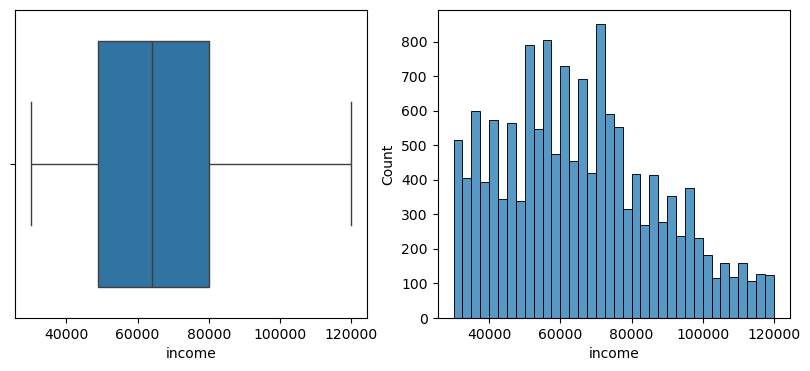

count     14613.000000
mean      65435.707931
std       21633.524110
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

In [82]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
sns.boxplot(data=profile,x='income',ax=ax[0])
sns.histplot(data=profile,x='income',ax=ax[1])
plt.show()
profile['income'].describe()

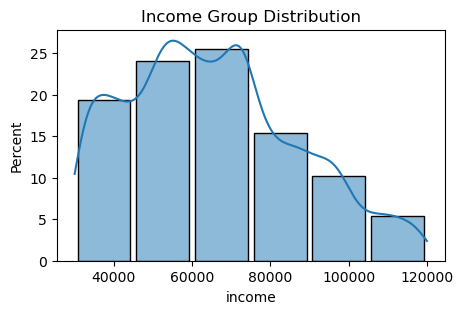

In [83]:
plt.figure(figsize=(5,3))
plt.title('Income Group Distribution')
sns.histplot(data=profile,x='income',bins=[30000,45000,60000,75000,90000,105000,120000],stat='percent',shrink=0.9,kde=True)
plt.show()

Observations:
- Income of customers has a range of 30k to 120k, with an average of 65.4k.
- Top 2 income groups consist of customers with annaul income of 60-75k and 45-60k. These account for approximately 45% of customers.
- The income distribution among the customers may, to a large extent, in line with that over the whole population, except that people with extremely low income might find it hard to afford regular cafe visits, while people with extremely high income may prefer other ways to enjoy their coffee.

In [84]:
profile['days_member'].describe()

count    14613.000000
mean      3061.991035
std        419.681797
min       2539.000000
25%       2747.000000
50%       2897.000000
75%       3337.000000
max       4362.000000
Name: days_member, dtype: float64

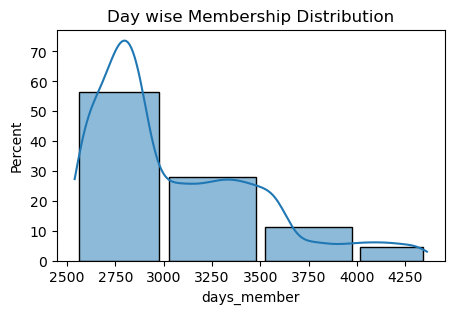

In [85]:
plt.figure(figsize=(5,3))
plt.title('Day wise Membership Distribution')
sns.histplot(data=profile,x='days_member',bins=[2537,3000,3500,4000,4360],kde=True,shrink=0.9,stat='percent')
plt.show()

Observations:
- Membership of the customers in this reward program is varied, ranging from 2539 days to 4362 days.
- Around 60% of the customers are within 3000 days of membership, which shows the growth of the customers in the platform. Thus, a more personalized approach of promotion may increase the customer growth in the upcoming years.

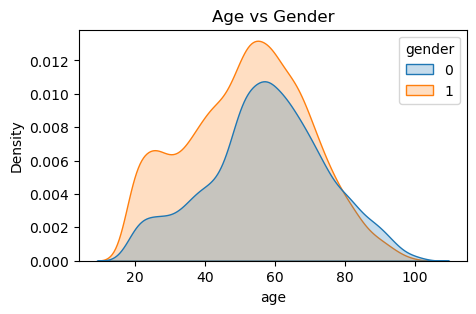

In [86]:
plt.figure(figsize=(5,3))
plt.title('Age vs Gender')
sns.kdeplot(data=profile,x='age',fill=True,hue='gender')
plt.show()
#0->Female,1->Male

In [87]:
profile.groupby('gender')['age'].mean()

gender
0    57.54495
1    52.11669
Name: age, dtype: float64

Observations:
- The number of female and male cutomers roughly follows a normal distribution.
- There is a larger proportion of young customers in males than females.
- Female customers and male customers are 57.5 and 52.1 years old on average.

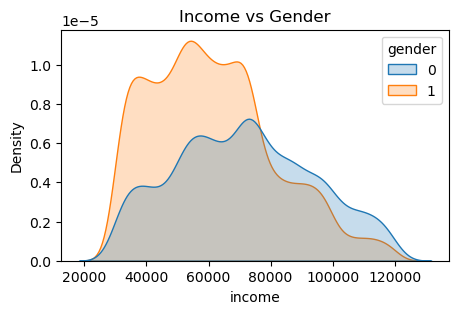

In [88]:
plt.figure(figsize=(5,3))
plt.title('Income vs Gender')
sns.kdeplot(data=profile,x='income',fill=True,hue='gender')
plt.show()
#0->Female,1->Male

In [89]:
profile.groupby('gender')['income'].mean()

gender
0    71306.412139
1    61194.601603
Name: income, dtype: float64

Observations:
- Income of female customers roughly follows a normal distribution. This indicates female customers accross the whole income range enjoys the company's products.
- Income of male customers is skewed to the right. This means among the company's male customers, more people are on the lower half of the income spectrum (among customers, not among US population, as shown below).
- Female customers have a much higher average income than other genders. This maybe because they are on average older than other gender groups, assumming older customers have higher incomes (it will be checked whether this assumption is true next).
- Average income of female customers and male customers are 71k and 61k.

In [90]:
age_grp=pd.cut(profile['age'],bins=[18,25,35,45,55,65,75,85,101],labels = ['18-24ys', '25-34ys', '35-44ys', '45-54ys', '55-64ys', '65-74ys', '75-84ys', '> 85ys'])

In [91]:
profile['age_group']=age_grp

In [92]:
income_grp=pd.cut(profile['income'],bins=[30000,45000,60000,75000,90000,105000,120000],labels = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k'])

In [93]:
profile['income_group']=income_grp

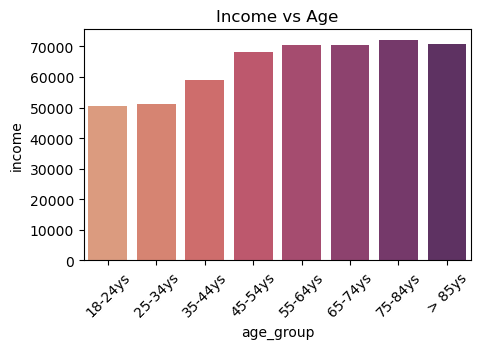

In [94]:
plt.figure(figsize=(5,3))
plt.title('Income vs Age')
sns.barplot(data=profile,x='age_group',y='income',errorbar=None,palette='flare')
plt.xticks(rotation=45)
plt.show()

In [95]:
profile.groupby('age_group')['income'].mean()

age_group
18-24ys    50463.519313
25-34ys    51211.466865
35-44ys    58949.334698
45-54ys    68211.894703
55-64ys    70499.244028
65-74ys    70411.125598
75-84ys    71994.671403
> 85ys     70753.479125
Name: income, dtype: float64

Observations:
- Customers in the two younger age groups (18-34 years old) has an average annual income of about 51k USD. The middle age groups (36-54 years old) has an average annual income of about 65k. All age groups above 55 years old have very similar average annual income of round 70k. On average, older customers of the company have higher incomes.
- The company's customers in all age groups have a much higher average income than the median income of US citizens (42,220 USD in 2023).

## 4.2 EDA on offer data

There are 10 offers with 5 variables in the dataset - 3 numerical and 2 categorical.

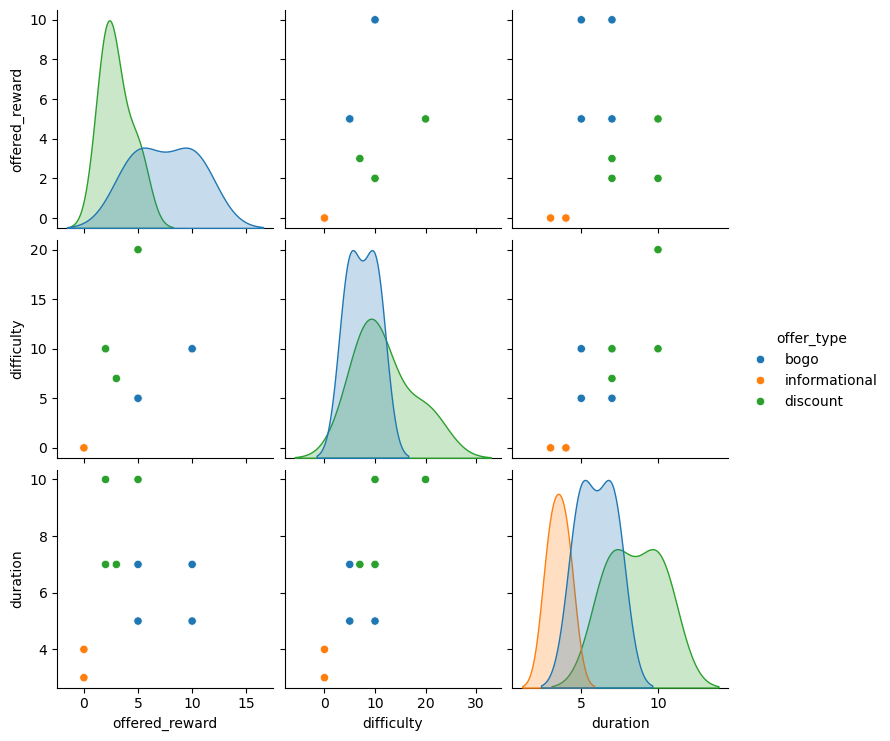

In [96]:
sns.pairplot(portfolio,hue='offer_type')
plt.show()

Observations:
- There are 4 'bogo' offers (i.e. buy one get one), 4 'discount' offers and 2 'informational' offers.
- 'Discount' offers tend to have the longest duration, followed by 'bogo' offers. 'Informational' offers have the shortest duration.
- 'Discount' offers tend to have higher difficulty but lower rewards compared with 'bogo' offers.
- Offer difficulty seems to be possitively correlated with offer reward.
- Offer duration seems to negatively correlate with reward and positively correlate with difficulty, when 'informational' offers are exclued (they don't really have reward or difficulty).

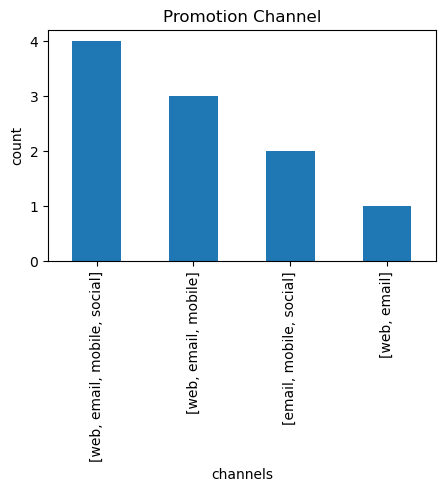

In [97]:
plt.title('Promotion Channel')
portfolio['channels'].value_counts().plot(kind='bar',figsize=(5,3))
plt.ylabel('count')
plt.show()

In [98]:
p=portfolio['channels'].value_counts().reset_index()
p

,channels,count
0,"[web, email, mobile, social]",4
1,"[web, email, mobile]",3
2,"[email, mobile, social]",2
3,"[web, email]",1


Observations:
Offers were sent to customers through combinations of 4 types of promotion channels websites, email, mobile App and social. There are 4 combinations of channels used by the 10 offers. Promotional effect of each channel can be extracted from comparisons between offers using different channels.

- 4 offers used all channels.
- 3 offers used all channels except for social meida. Promotional effect of social media could be extract from certain forms of comparison between these offers with offers using all channels.
- 2 offers used all channels except for websites. Promotional effect of websites could be extract from comparison between these offers with offers using all channels.
- 2 offers only used websites and email. Promotional effect of mobile App can be extracted from comparison between these offer with offers in the orange group. Moreover, as the effect of websites can be derived from other comparisons, promotional effect of emails can also be extracted.

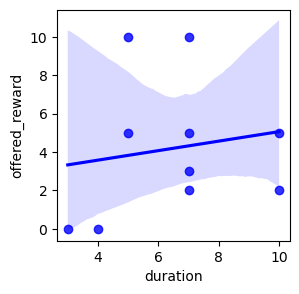

In [99]:
plt.figure(figsize=(3,3))
sns.regplot(data=portfolio,x='duration',y='offered_reward',color='blue')
plt.show()

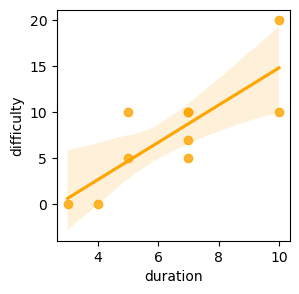

In [100]:
plt.figure(figsize=(3,3))
sns.regplot(data=portfolio,x='duration',y='difficulty',color='orange')
plt.show()

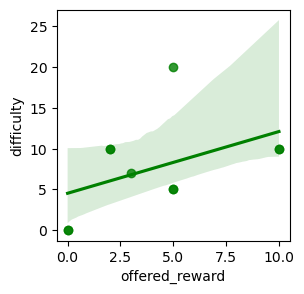

In [101]:
plt.figure(figsize=(3,3))
sns.regplot(data=portfolio,x='offered_reward',y='difficulty',color='green')
plt.show()

Observations:
- There is an almost positive relationship between offer dutation and reward.
- There is a more strict positive relationship between offer dutation and difficulty.
- Rewards and difficulty also shows a positive relationship.

## 4.3. EDA on transcripts data

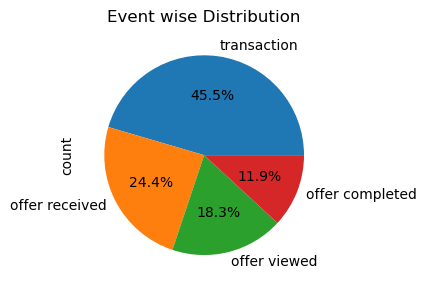

In [102]:
plt.title('Event wise Distribution')
transcript['event'].value_counts().plot(kind='pie',autopct='%0.1f%%',figsize=(5,3))
plt.tight_layout()
plt.show()

In [103]:
transcript['event'].value_counts()

event
transaction        122176
offer received      65585
offer viewed        49087
offer completed     31943
Name: count, dtype: int64

Observations:
- In the dataset, there are ~120,000 transactions (purchases). This number is slightly above 4 time of offers completed, indicating many customers made multiple purchases without an offer. This shows good customer stickiness in general. However, this is also, to some extent, as expected, because products of Starbucks are mainly coffee and food, which are fast-moving customer goods (FMCG).
- Approximately 65,585 offers were received by customers during the month of campaign, 49,087 of which were viewed by customers. This reasonaly high view rate reflects a high level of customer activity and perhaps good design of promotion slogan that attracted customers to click.
- There were 31,943 offer completions. This relatively high offer completion rate reflects good customer stickiness. It is likely that there is a decent number of regular customers.

In [104]:
transcript['days_since_start']=transcript['time']/24

In [105]:
transcript['days_since_start']=transcript['days_since_start'].astype('int32')

In [106]:
print('The offer continues from',transcript['days_since_start'].min(),'to',transcript['days_since_start'].max(),'days.')

The offer continues from 0 to 29 days.


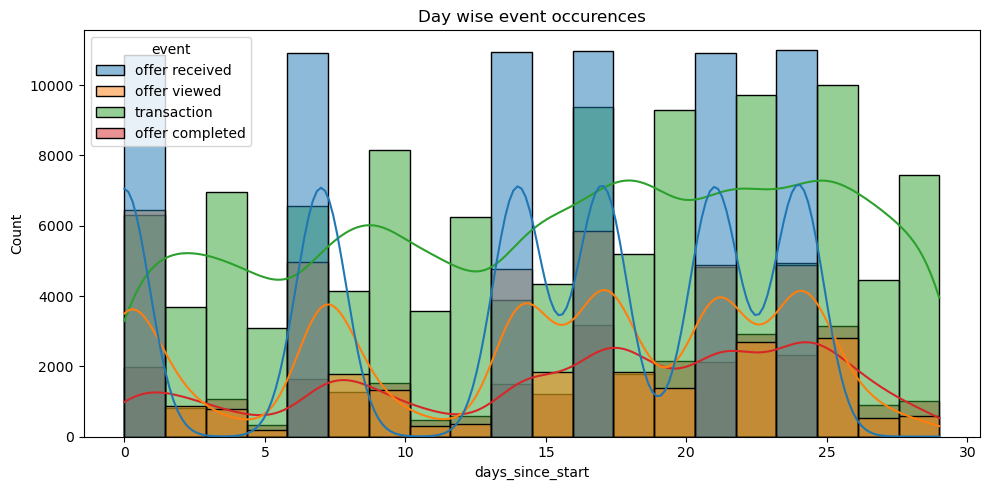

In [107]:
plt.figure(figsize=(10,5))
sns.histplot(data=transcript,x='days_since_start',bins=20,kde=True,hue='event')
plt.title('Day wise event occurences')
plt.tight_layout()
plt.show()

In [109]:
transcript[transcript['event']=='offer received'].groupby('days_since_start')['customer_id'].count()

days_since_start
0     10862
7     10907
14    10931
17    10967
21    10907
24    11011
Name: customer_id, dtype: int64

The offers were received on 6 days (within one hours each time) during the compaign.

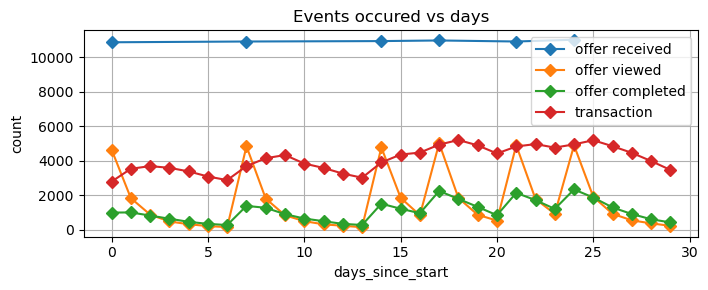

In [108]:
# received_df, viewed_df, completed_df
plt.title('Events occured vs days')
transcript[transcript['event']=='offer received'].groupby('days_since_start')['customer_id'].count().plot(kind='line',figsize=(7,3),marker='D')
transcript[transcript['event']=='offer viewed'].groupby('days_since_start')['customer_id'].count().plot(kind='line',figsize=(7,3),marker='D')
transcript[transcript['event']=='offer completed'].groupby('days_since_start')['customer_id'].count().plot(kind='line',figsize=(7,3),marker='D')
transcript[transcript['event']=='transaction'].groupby('days_since_start')['customer_id'].count().plot(kind='line',figsize=(7,3),marker='D')
plt.legend(['offer received','offer viewed','offer completed','transaction'])
plt.grid()
plt.tight_layout()
plt.ylabel('count')
plt.show()

Observations:
- Offer completion was highly correlated with offer viewing (green v.s. orange). In the plot, each peak of offer viewing is followed by a peak of offer completeion, with a very short lag in time. This indicates customers who clicked on the offer tended to use it. The location of peaks of offer viewing and offer completeion align perfectly, showing that a large fraction of customers completed the offer on the same day of viewing.
- Transactions (red) is also clearly correlated with the other two types of events, however, showing a more spreaded pattern.
- Comparing offer completion and transactions (green and red) reveals a very interesting phenomenon. After each viewing peak, offer completion reaches its peak very quicly , while the transaction keeps increasing and reaches its peak after about two days. This indicates that the offers did not only bring in more purchases by customer directly using the offers (enjoyed a discount or other benefit), but also help form customer's purchasing habbit (although short-lived by individual offers).
  
Insights:
- Offers do not only bring in revenue directly, but also help improve customer stickiness. The effect of each individual offer is short-lived, therefore the company should send offers to customers at a certain frequency to help form their pruchasing habbit.
- The optimal frequency and consistency of sending offers could be found in a new promotion campaign.

## 5. POPULARITY OF THE OFFERS

In this analysis, being popular means an offer having achieved a high overall completion rate (number of offers completed divided by number of offers received).

From an action-oriented perspective, completing an offer requires two actions from the customers - to view it, then to complete it. Therefore, the overall completion rate is determined by two metrics:

- View rate (number of offers viewed divided by number of offers received)
- Completion rate (number of offers completed divided by number of offers viewed)

In [110]:
offers_df=transcript[transcript['event']!='transaction']

In [111]:
merge1=offers_df.merge(portfolio,left_on='actual_value',right_on='offer_id')

In [112]:
merge1.drop(columns=['actual_value'],inplace=True)

In [113]:
merge1

,customer_id,event,time,value_type,days_since_start,offered_reward,channels,difficulty,duration,offer_type,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,0,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,0,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5
2,389bc3fa690240e798340f5a15918d5c,offer received,0,offer id,0,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
3,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,offer id,0,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
4,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,offer id,0,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
...,...,...,...,...,...,...,...,...,...,...,...
146610,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,714,offer id,29,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
146611,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,714,offer id,29,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
146612,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,714,offer id,29,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
146613,8431c16f8e1d440880db371a68f82dd0,offer completed,714,offer_id,29,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4


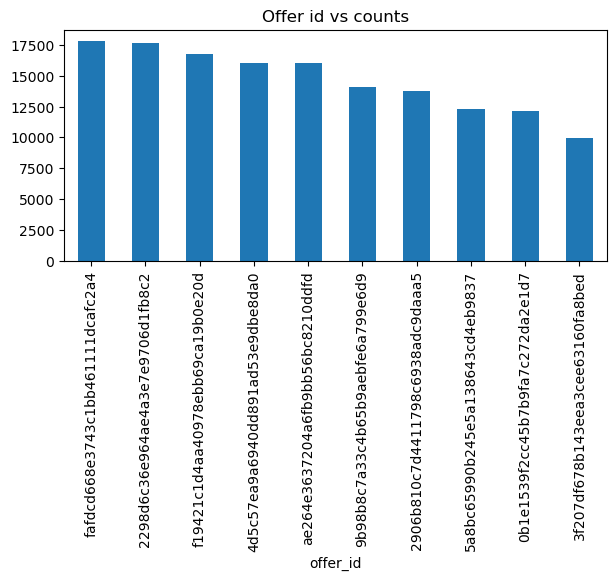

In [114]:
merge1['offer_id'].value_counts().plot(kind='bar',figsize=(7,3))
plt.title('Offer id vs counts')
plt.show()

In [115]:
merge1['offer_id'].value_counts()

offer_id
fafdcd668e3743c1bb461111dcafc2a4    17820
2298d6c36e964ae4a3e7e9706d1fb8c2    17671
f19421c1d4aa40978ebb69ca19b0e20d    16749
4d5c57ea9a6940dd891ad53e9dbe8da0    16044
ae264e3637204a6fb9bb56bc8210ddfd    16006
9b98b8c7a33c4b65b9aebfe6a799e6d9    14121
2906b810c7d4411798c6938adc9daaa5    13789
5a8bc65990b245e5a138643cd4eb9837    12326
0b1e1539f2cc45b7b9fa7c272da2e1d7    12111
3f207df678b143eea3cee63160fa8bed     9978
Name: count, dtype: int64

In [116]:
merge1[merge1['event']=='offer received']['offer_id'].value_counts()

offer_id
0b1e1539f2cc45b7b9fa7c272da2e1d7    6627
ae264e3637204a6fb9bb56bc8210ddfd    6590
9b98b8c7a33c4b65b9aebfe6a799e6d9    6584
fafdcd668e3743c1bb461111dcafc2a4    6564
2298d6c36e964ae4a3e7e9706d1fb8c2    6563
3f207df678b143eea3cee63160fa8bed    6561
5a8bc65990b245e5a138643cd4eb9837    6544
2906b810c7d4411798c6938adc9daaa5    6543
4d5c57ea9a6940dd891ad53e9dbe8da0    6521
f19421c1d4aa40978ebb69ca19b0e20d    6488
Name: count, dtype: int64

In [117]:
merge1[merge1['event']=='offer viewed']['offer_id'].value_counts()

offer_id
fafdcd668e3743c1bb461111dcafc2a4    6319
2298d6c36e964ae4a3e7e9706d1fb8c2    6289
4d5c57ea9a6940dd891ad53e9dbe8da0    6258
f19421c1d4aa40978ebb69ca19b0e20d    6225
ae264e3637204a6fb9bb56bc8210ddfd    5818
5a8bc65990b245e5a138643cd4eb9837    5782
9b98b8c7a33c4b65b9aebfe6a799e6d9    3423
3f207df678b143eea3cee63160fa8bed    3417
2906b810c7d4411798c6938adc9daaa5    3395
0b1e1539f2cc45b7b9fa7c272da2e1d7    2161
Name: count, dtype: int64

In [118]:
merge1[merge1['event']=='offer completed']['offer_id'].value_counts()

offer_id
fafdcd668e3743c1bb461111dcafc2a4    4937
2298d6c36e964ae4a3e7e9706d1fb8c2    4819
9b98b8c7a33c4b65b9aebfe6a799e6d9    4114
f19421c1d4aa40978ebb69ca19b0e20d    4036
2906b810c7d4411798c6938adc9daaa5    3851
ae264e3637204a6fb9bb56bc8210ddfd    3598
0b1e1539f2cc45b7b9fa7c272da2e1d7    3323
4d5c57ea9a6940dd891ad53e9dbe8da0    3265
Name: count, dtype: int64

In [119]:
#VIEW RATE
viewr=(merge1[merge1['event']=='offer viewed']['offer_id'].value_counts().sort_index()/merge1[merge1['event']=='offer received']['offer_id'].value_counts().sort_index()).sort_values(ascending=False)
viewr

offer_id
fafdcd668e3743c1bb461111dcafc2a4    0.962675
4d5c57ea9a6940dd891ad53e9dbe8da0    0.959669
f19421c1d4aa40978ebb69ca19b0e20d    0.959464
2298d6c36e964ae4a3e7e9706d1fb8c2    0.958251
5a8bc65990b245e5a138643cd4eb9837    0.883557
ae264e3637204a6fb9bb56bc8210ddfd    0.882853
3f207df678b143eea3cee63160fa8bed    0.520805
9b98b8c7a33c4b65b9aebfe6a799e6d9    0.519897
2906b810c7d4411798c6938adc9daaa5    0.518875
0b1e1539f2cc45b7b9fa7c272da2e1d7    0.326090
Name: count, dtype: float64

In [120]:
#COMPLETION RATE
compler=(merge1[merge1['event']=='offer completed']['offer_id'].value_counts().sort_index()/merge1[merge1['event']=='offer viewed']['offer_id'].value_counts().sort_index()).sort_values(ascending=False)
compler

offer_id
0b1e1539f2cc45b7b9fa7c272da2e1d7    1.537714
9b98b8c7a33c4b65b9aebfe6a799e6d9    1.201870
2906b810c7d4411798c6938adc9daaa5    1.134315
fafdcd668e3743c1bb461111dcafc2a4    0.781295
2298d6c36e964ae4a3e7e9706d1fb8c2    0.766259
f19421c1d4aa40978ebb69ca19b0e20d    0.648353
ae264e3637204a6fb9bb56bc8210ddfd    0.618426
4d5c57ea9a6940dd891ad53e9dbe8da0    0.521732
3f207df678b143eea3cee63160fa8bed         NaN
5a8bc65990b245e5a138643cd4eb9837         NaN
Name: count, dtype: float64

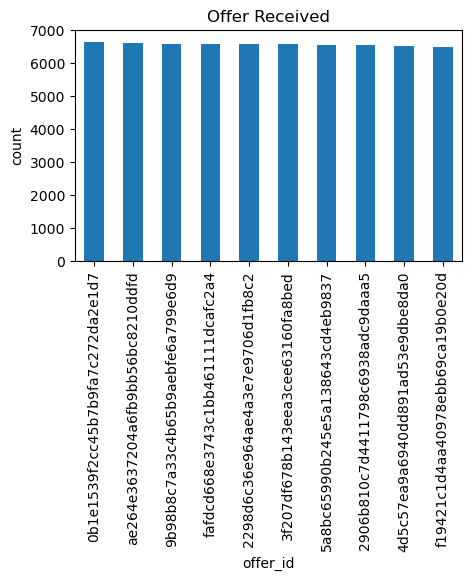

In [122]:
plt.title('Offer Received')
merge1[merge1['event']=='offer received']['offer_id'].value_counts().plot(kind='bar',figsize=(5,3))
plt.ylim(0,7000)
plt.ylabel('count')
plt.show()

Observation: All 10 offers have been received almost the same number of times, approximately 6500, during the month of campaign.

From previous analysis, we know that the offers were received on 6 days over the campaign. Before turning to the view rate of each offer, we need to check whether the offers were received in a certain order by all customers, becuase receiving order may affect their response to different offers, therefore leads to systematic bias on the view rate and completion rate.

In [124]:
received.groupby(['days_since_start','actual_value'])['customer_id'].count()

days_since_start  actual_value                    
0                 0b1e1539f2cc45b7b9fa7c272da2e1d7    1131
                  2298d6c36e964ae4a3e7e9706d1fb8c2    1051
                  2906b810c7d4411798c6938adc9daaa5    1078
                  3f207df678b143eea3cee63160fa8bed    1085
                  4d5c57ea9a6940dd891ad53e9dbe8da0    1062
                  5a8bc65990b245e5a138643cd4eb9837    1078
                  9b98b8c7a33c4b65b9aebfe6a799e6d9    1051
                  ae264e3637204a6fb9bb56bc8210ddfd    1114
                  f19421c1d4aa40978ebb69ca19b0e20d    1086
                  fafdcd668e3743c1bb461111dcafc2a4    1126
7                 0b1e1539f2cc45b7b9fa7c272da2e1d7    1081
                  2298d6c36e964ae4a3e7e9706d1fb8c2    1058
                  2906b810c7d4411798c6938adc9daaa5    1081
                  3f207df678b143eea3cee63160fa8bed    1086
                  4d5c57ea9a6940dd891ad53e9dbe8da0    1063
                  5a8bc65990b245e5a138643cd4eb9837    1091
     

Observations: Each offer was received for a similar number of time on every offer receiving day (Day 0, 7, 14, 17, 21 and 24). This prevents systemetic bias on customer behaviour due to the order of offers being received.

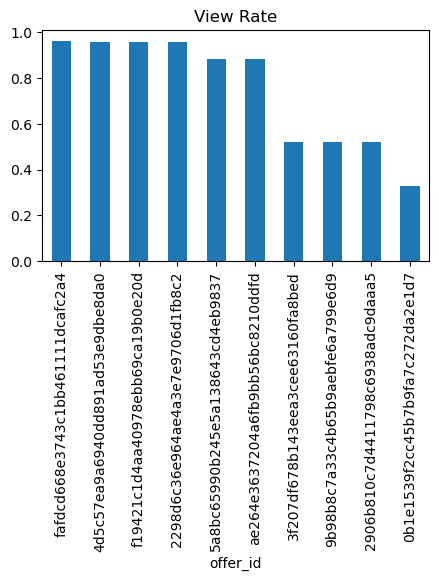

In [125]:
plt.title('View Rate')
viewr.plot(kind='bar',figsize=(5,3))
plt.show()

In [126]:
portfolio[['offer_id','channels']]

#hence publicity is equivalent to offers viewed

,offer_id,channels
0,ae264e3637204a6fb9bb56bc8210ddfd,"[email, mobile, social]"
1,4d5c57ea9a6940dd891ad53e9dbe8da0,"[web, email, mobile, social]"
2,3f207df678b143eea3cee63160fa8bed,"[web, email, mobile]"
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]"
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,"[web, email]"
5,2298d6c36e964ae4a3e7e9706d1fb8c2,"[web, email, mobile, social]"
6,fafdcd668e3743c1bb461111dcafc2a4,"[web, email, mobile, social]"
7,5a8bc65990b245e5a138643cd4eb9837,"[email, mobile, social]"
8,f19421c1d4aa40978ebb69ca19b0e20d,"[web, email, mobile, social]"
9,2906b810c7d4411798c6938adc9daaa5,"[web, email, mobile]"


Observations:
- Very interesting information is revealed here. The 10 bars, representing the 10 offers, clearly show 4 levels in height, separating the offers into 4 groups.

GROUP 1: email, mobile, social, web
GROUP 2: email, mobile, social
GROUP 3: email, mobile, web
GROUP 4: email, web

Conclusion:
- Offers sent through the same promotion channels had very similar view rate, despite of the difference in other factors (offer type, duration, reward and difficulty). Therefore, promotion channels is the most important (if not only) factor on the offer view rate.
- All channels contributed to offer view rate. However, their importance clearly differs:
Social Media > Email >= Mobile > Websites


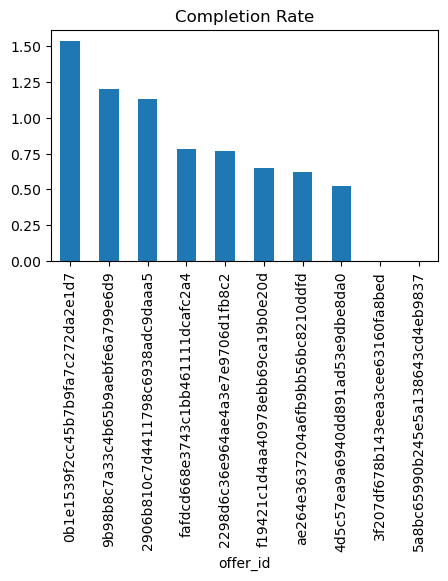

In [121]:
plt.title('Completion Rate')
compler.plot(kind='bar',figsize=(5,3))
plt.show()

Observations:
- For offers with 5 top completion rate, all are of type 'discount', with Offer A being the only exception. This reveals that customers preferred 'dicount' type to 'bogo'.
Hence, the main factor influencing offer completion rate is the offer type, 'Discount' > 'bogo'.

Conclusion:
- Offers that achieved a high completion rate do not necessarily have a high view rate. In fact, the competion rate and view rate almost had an opposite trend.
- This indicates that the offer competion rate and the offer view rate were driving by different factors. 


In [123]:
received= offers_df[offers_df['event']=='offer received']
received

,customer_id,event,time,value_type,actual_value,days_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5,0
5,389bc3fa690240e798340f5a15918d5c,offer received,0,offer id,f19421c1d4aa40978ebb69ca19b0e20d,0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,offer id,3f207df678b143eea3cee63160fa8bed,0
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
...,...,...,...,...,...,...
257882,d087c473b4d247ccb0abfef59ba12b0e,offer received,576,offer id,ae264e3637204a6fb9bb56bc8210ddfd,24
257883,cb23b66c56f64b109d673d5e56574529,offer received,576,offer id,2906b810c7d4411798c6938adc9daaa5,24
257884,6d5f3a774f3d4714ab0c092238f3a1d7,offer received,576,offer id,2298d6c36e964ae4a3e7e9706d1fb8c2,24
257885,9dc1421481194dcd9400aec7c9ae6366,offer received,576,offer id,ae264e3637204a6fb9bb56bc8210ddfd,24


In [127]:
#viewr.reset_index()
vc=compler.reset_index().merge(viewr.reset_index(),on='offer_id')
vc

,offer_id,count_x,count_y
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.537714,0.326090
1,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.201870,0.519897
2,2906b810c7d4411798c6938adc9daaa5,1.134315,0.518875
3,fafdcd668e3743c1bb461111dcafc2a4,0.781295,0.962675
4,2298d6c36e964ae4a3e7e9706d1fb8c2,0.766259,0.958251
5,f19421c1d4aa40978ebb69ca19b0e20d,0.648353,0.959464
6,ae264e3637204a6fb9bb56bc8210ddfd,0.618426,0.882853
7,4d5c57ea9a6940dd891ad53e9dbe8da0,0.521732,0.959669
8,3f207df678b143eea3cee63160fa8bed,NaN,0.520805
9,5a8bc65990b245e5a138643cd4eb9837,NaN,0.883557


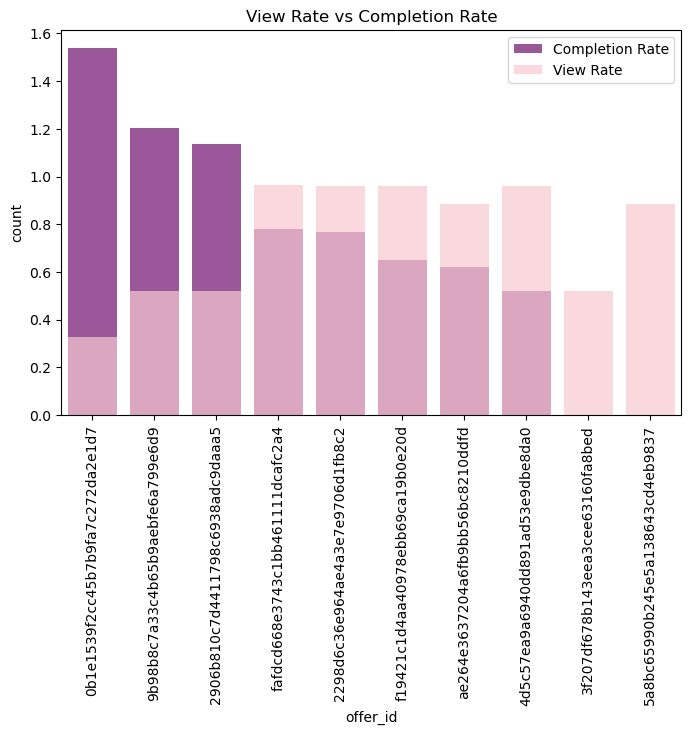

In [128]:
plt.figure(figsize=(8,5))
plt.title('View Rate vs Completion Rate')
sns.barplot(data=vc,x='offer_id',y='count_x',alpha=0.7,color='purple',label='Completion Rate')
sns.barplot(data=vc,x='offer_id',y='count_y',alpha=0.7,color='pink',label='View Rate')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.legend()
plt.show()

Observation:
- The earlier analysis that view rates and completion rates are independent and are governed by different factors is clearly visible in this bar plot, that not necessarily for a particular offer if view rate is higher, completion rate also has to be high and vice versa.

In [129]:
portfolio[['offer_id','offer_type']]

,offer_id,offer_type
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo
2,3f207df678b143eea3cee63160fa8bed,informational
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount
5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount
6,fafdcd668e3743c1bb461111dcafc2a4,discount
7,5a8bc65990b245e5a138643cd4eb9837,informational
8,f19421c1d4aa40978ebb69ca19b0e20d,bogo
9,2906b810c7d4411798c6938adc9daaa5,discount


In [130]:
vc.rename(columns={'count_x':'completion_rate','count_y':'view_rate'},inplace=True)

In [131]:
vc

,offer_id,completion_rate,view_rate
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.537714,0.326090
1,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.201870,0.519897
2,2906b810c7d4411798c6938adc9daaa5,1.134315,0.518875
3,fafdcd668e3743c1bb461111dcafc2a4,0.781295,0.962675
4,2298d6c36e964ae4a3e7e9706d1fb8c2,0.766259,0.958251
5,f19421c1d4aa40978ebb69ca19b0e20d,0.648353,0.959464
6,ae264e3637204a6fb9bb56bc8210ddfd,0.618426,0.882853
7,4d5c57ea9a6940dd891ad53e9dbe8da0,0.521732,0.959669
8,3f207df678b143eea3cee63160fa8bed,NaN,0.520805
9,5a8bc65990b245e5a138643cd4eb9837,NaN,0.883557


In [132]:
vc_filtered=vc.merge(portfolio,on='offer_id')

In [133]:
vc_filtered.drop(columns=['channels','offer_type'],inplace=True)

In [134]:
vc_filtered=vc_filtered.set_index('offer_id')

In [135]:
vc_filtered.iloc[:,1:].corr()

,view_rate,offered_reward,difficulty,duration
view_rate,1.000000,0.228564,-0.294453,-0.255950
offered_reward,0.228564,1.000000,0.465686,0.160262
difficulty,-0.294453,0.465686,1.000000,0.808414
duration,-0.255950,0.160262,0.808414,1.000000


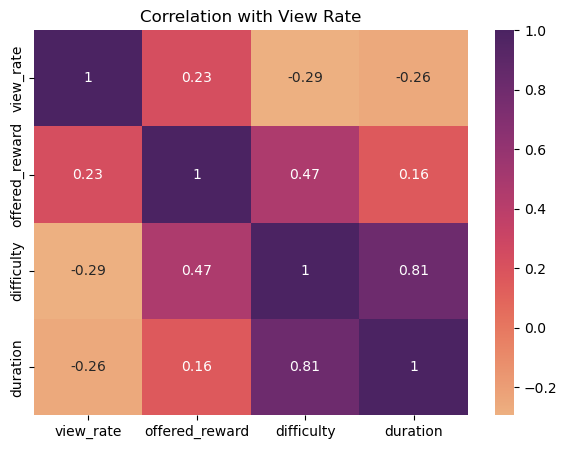

In [136]:
plt.figure(figsize=(7,5))
plt.title('Correlation with View Rate')
sns.heatmap(vc_filtered.iloc[:,1:].corr(),cmap='flare',annot=True)
plt.show()

In [137]:
vc_filtered.iloc[:,[0,2,3,4]].corr()

,completion_rate,offered_reward,difficulty,duration
completion_rate,1.000000,-0.428594,0.557147,0.597390
offered_reward,-0.428594,1.000000,0.465686,0.160262
difficulty,0.557147,0.465686,1.000000,0.808414
duration,0.597390,0.160262,0.808414,1.000000


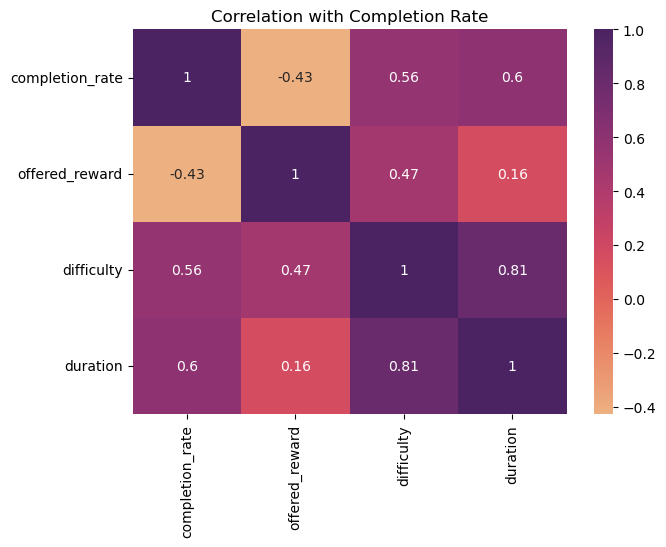

In [138]:
plt.figure(figsize=(7,5))
plt.title('Correlation with Completion Rate')
sns.heatmap(vc_filtered.iloc[:,[0,2,3,4]].corr(),cmap='flare',annot=True)
plt.show()

Observations:
View Rate %
- All of the three numeric factors (rewards, difficulty and duration) had a trivial correlation with the view rate.

Complete Rate %
- Counter-intuitively, reward seems to be negatively correlated with offer completion rate. Note this does not mean reward negatively affected the completion rate. It was the fact that completion rate was predominantly influenced by offer type and that 'bogo' offers happened to have higher rewards (7.5 USD on average) than the 'discount' offers (3 USD on average) that led to this seemingly counter-intuitive result.
- Similarly, offer difficulty seems to be possitively correlated with offer completion rate, but this does not mean difficulty positively affected the completion rate. The less popular 'bogo' offers had a lower difficulty (7.5 USD on average) than the more popular 'discount' offers (11.75 USD on average).
- Duration seems to be positively correlated with offer complete rate. This makes sense as cutomers are more likely to complete an offer if they are given more time.
- None of their effect on the completion rate is as determinative as the offer type.

## SECTION SUMMARY 
This section focused on the popularity of the offers. The popularity of an offer is measured by the overall completion rate. The completion rate was broken down into two metrics - the view rate and the completion rate based on offers viewed.

Suggestions:
- The company should send offers to customers through as many channels as possible. However, if the budget is tight, social media is the first choose as customers are most likely to view from there.
- 'Discount' is the offer type to choose as it leads to high offer completion rate.

## 6. CUSTOMER SEGMENTATION

In this section, customers will be assigned to segments based on their transactional records during the month of campiagn. Features extracted include (or each customer) number of offers received, number of offers viewed, number of offers completed, number of transactions made (during the month of campiagn) and total amount of money spent. K-Means clustering will be used to conduct the segmentation. I will use the Elbow method and the Silhouette scores to decide the number of clusters k.


When analyizing and assessing the clustering results, clusters will first be visualized with 3 feature pairs in 2D planes. This will allow a quick check on whether the clustering results make intuitive sense. I will use a heatmap that reflects the relative performance of each cluster when customers were assigned to clusters to understand each cluster in a summarized manner.


For interpreting the clusters, key metrics will be calculated for each cluster. These include Average Purchase Value (APV), purchase frequency, (overall) offer complete rate and sensitivity to offers. This will lead to a comprehensive understanding of cutomer behavior for each cluster and I will label each cluster with a self-explanatory name.

Finally, I will look at the demographic profile of each cluster.

## 6.1 Extracting Customer Dataframe based on customer behavior Features
Features for clusteing will be extracted including, for each customer, number of offers received, number of offers viewed, number of offers completed, number of transactions made (during the month of campiagn) and total amount of money spent.

In [139]:
transcript.shape

(268791, 6)

In [140]:
transcript['customer_id'].nunique()

14613

In [141]:
transcript.head(1)

,customer_id,event,time,value_type,actual_value,days_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,0


In [142]:
trans=transcript.groupby(['customer_id','event']).count()
trans

time  value_type  \
customer_id                      event                               
0009655768c64bdeb2e877511632db8f offer completed     3           3   
                                 offer received      5           5   
                                 offer viewed        4           4   
                                 transaction         8           8   
0020c2b971eb4e9188eac86d93036a77 offer completed     3           3   
...                                                ...         ...   
fffad4f4828548d1b5583907f2e9906b transaction        12          12   
ffff82501cea40309d5fdd7edcca4a07 offer completed     6           6   
                                 offer received      6           6   
                                 offer viewed        6           6   
                                 transaction        15          15   

                                                  actual_value  \
customer_id                      event                           
0009655768c64bdeb2e877511632db8f offer completed             3   
                                 offer received              5   
                                 offer viewed                4   
                                 transaction                 8   
0020c2b971eb4e9188eac86d93036a77 offer completed             3   
...                                                        ...   
fffad4f4828548d1b5583907f2e9906b transaction                12   
ffff82501cea40309d5fdd7edcca4a07 offer completed             6   
                                 offer received              6   
                                 offer viewed                6   
                                 transaction                15   

                                                  days_since_start  
customer_id                      event                              
0009655768c64bdeb2e877511632db8f offer completed                 3  
                                 offer received                  5  
                                 offer viewed                    4  
                                 transaction                     8  
0020c2b971eb4e9188eac86d93036a77 offer completed                 3  
...                                                            ...  
fffad4f4828548d1b5583907f2e9906b transaction                    12  
ffff82501cea40309d5fdd7edcca4a07 offer completed                 6  
                                 offer received                  6  
                                 offer viewed                    6  
                                 transaction                    15  

[55167 rows x 4 columns]

In [143]:
customer=pd.DataFrame(columns=['person','num_received','num_viewed','num_completed','num_transactions','money_spent'])

In [144]:
customer['person']=trans.reset_index()['customer_id'].unique()

In [145]:
customer['person']

0        0009655768c64bdeb2e877511632db8f
1        0020c2b971eb4e9188eac86d93036a77
2        0020ccbbb6d84e358d3414a3ff76cffd
3        003d66b6608740288d6cc97a6903f4f0
4        00426fe3ffde4c6b9cb9ad6d077a13ea
                       ...               
14608    fff3ba4757bd42088c044ca26d73817a
14609    fff7576017104bcc8677a8d63322b5e1
14610    fff8957ea8b240a6b5e634b6ee8eafcf
14611    fffad4f4828548d1b5583907f2e9906b
14612    ffff82501cea40309d5fdd7edcca4a07
Name: person, Length: 14613, dtype: object

In [146]:
customer.set_index('person', inplace = True)

In [147]:
trans.index.values

array([('0009655768c64bdeb2e877511632db8f', 'offer completed'),
       ('0009655768c64bdeb2e877511632db8f', 'offer received'),
       ('0009655768c64bdeb2e877511632db8f', 'offer viewed'), ...,
       ('ffff82501cea40309d5fdd7edcca4a07', 'offer received'),
       ('ffff82501cea40309d5fdd7edcca4a07', 'offer viewed'),
       ('ffff82501cea40309d5fdd7edcca4a07', 'transaction')], dtype=object)

In [148]:
for person_id in customer.index.values:
    if (person_id, 'offer received') in list(trans.index.values):
        customer.loc[person_id, 'num_received'] = trans.loc[(person_id, 'offer received'), 'value_type']
    if (person_id, 'offer viewed') in list(trans.index.values):
        customer.loc[person_id, 'num_viewed'] = trans.loc[(person_id, 'offer viewed'), 'value_type']
    if (person_id, 'offer completed') in list(trans.index.values):
        customer.loc[person_id, 'num_completed'] = trans.loc[(person_id, 'offer completed'), 'value_type']
    if (person_id, 'transaction') in list(trans.index.values):
        customer.loc[person_id, 'num_transactions'] = trans.loc[(person_id, 'transaction'), 'value_type']

In [149]:
money_spent=transcript[transcript['event']=='transaction'].groupby('customer_id')['actual_value'].sum()
customer['money_spent']=money_spent

In [150]:
customer

,num_received,num_viewed,num_completed,num_transactions,money_spent
person,,,,,
0009655768c64bdeb2e877511632db8f,5,4,3,8,127.6
0020c2b971eb4e9188eac86d93036a77,5,3,3,8,196.86
0020ccbbb6d84e358d3414a3ff76cffd,4,4,3,12,154.05
003d66b6608740288d6cc97a6903f4f0,5,4,3,18,48.34
00426fe3ffde4c6b9cb9ad6d077a13ea,5,2,1,17,68.51
...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,6,3,3,11,580.98
fff7576017104bcc8677a8d63322b5e1,5,4,3,6,29.94
fff8957ea8b240a6b5e634b6ee8eafcf,3,2,NaN,5,12.15


In [151]:
customer.shape

(14613, 5)

In [152]:
customer.isnull().sum()

num_received           5
num_viewed           149
num_completed       2806
num_transactions     325
money_spent          325
dtype: int64

Note: There are 5 customers that did not receive any offer during the campaign (but they have made purchases to appear in our data).

This results in NAs in the aggregated df and will be replaced with 0s, as these customers received, viewed, completed 0 offers or made 0 transactions.

In [153]:
#replacing null values

customer.fillna(0, inplace = True)
customer.isnull().sum()

num_received        0
num_viewed          0
num_completed       0
num_transactions    0
money_spent         0
dtype: int64

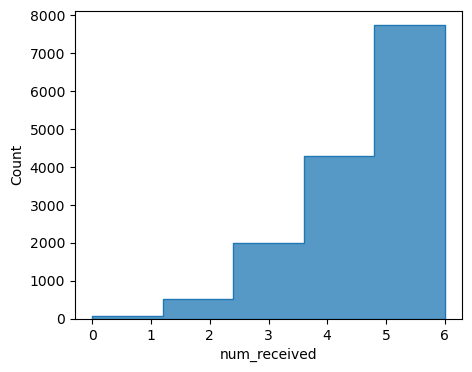

In [154]:
plt.figure(figsize=(5,4))
sns.histplot(data=customer,x='num_received',bins=5,element='step')
plt.show()

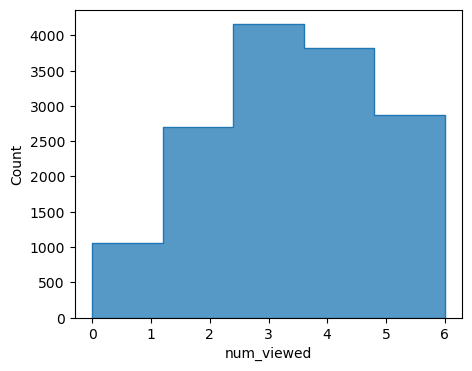

In [155]:
plt.figure(figsize=(5,4))
sns.histplot(data=customer,x='num_viewed',bins=5,element='step')
plt.show()

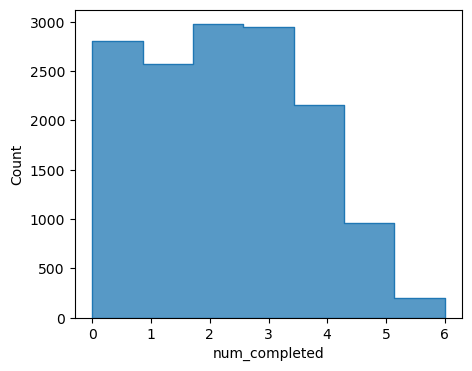

In [156]:
plt.figure(figsize=(5,4))
sns.histplot(data=customer,x='num_completed',bins=7,element='step')
plt.show()

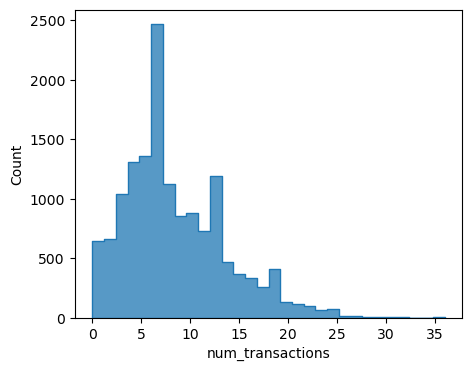

In [157]:
plt.figure(figsize=(5,4))
sns.histplot(data=customer,x='num_transactions',bins=30,element='step')
plt.show()

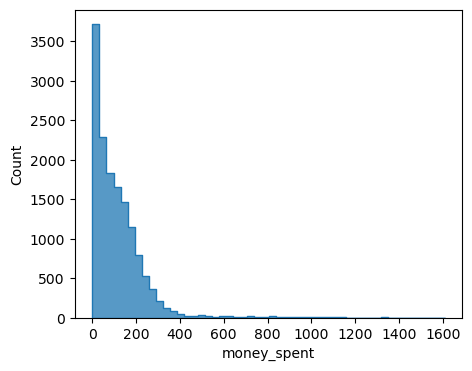

In [158]:
plt.figure(figsize=(5,4))
sns.histplot(data=customer,x='money_spent',bins=50,element='step')
plt.show()

In [159]:
cust_old=customer.copy()

Dropping column num_received
I am going to be using features about customer behavior for clustering analysis. However, number of offers received was not actively decided by customers, therfore I will drop it when running clustering.

In [160]:
customer.drop(columns=['num_received'],inplace=True)
customer.head()

,num_viewed,num_completed,num_transactions,money_spent
person,,,,
0009655768c64bdeb2e877511632db8f,4,3,8,127.60
0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86
0020ccbbb6d84e358d3414a3ff76cffd,4,3,12,154.05
003d66b6608740288d6cc97a6903f4f0,4,3,18,48.34
00426fe3ffde4c6b9cb9ad6d077a13ea,2,1,17,68.51


Remove outliers:
From the plots above, feature money_spent is clearly skewed by outliers,

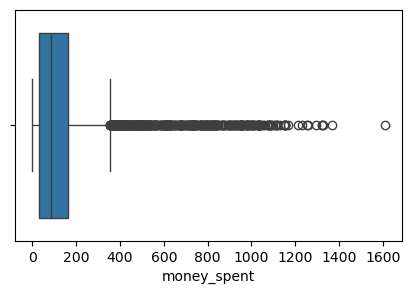

In [161]:
#checking if outliers are present

plt.figure(figsize=(5,3))
sns.boxplot(data=customer,x='money_spent')
plt.show()

In [162]:
customer['money_spent'].describe()

count    14613.000000
mean       116.922320
std        130.125954
min          0.000000
25%         31.350000
50%         86.770000
75%        160.770000
max       1608.690000
Name: money_spent, dtype: float64

In [163]:
top=customer['money_spent'].quantile(0.98)
drop=customer[customer['money_spent']>=top]
customer.drop(drop.index,inplace=True)

In [164]:
print('Number of profile removed as outliers:',(cust_old.shape[0]-customer.shape[0]))

Number of profile removed as outliers: 293


The 0.75 quantile is only about 160 USD, while the maximum is ten times of it. I will remove receord with top 2% in money_spent for runNing the K-Means Clustering.

Note: These customers are high-valued customers. After the other customers have been placed into clusters, they will either be added to a suitable cluster, or form their a cluster of their own.

In [165]:
customer.duplicated().sum()

353

In [166]:
customer.shape

(14320, 4)

In [167]:
customer.drop_duplicates(inplace=True)

In [168]:
#after removing duplicates from the data
customer.shape

(13967, 4)

Removing duplicate values is necessary for running clustering algorithm to remove any kind of biasness cause due to this duplicacy.

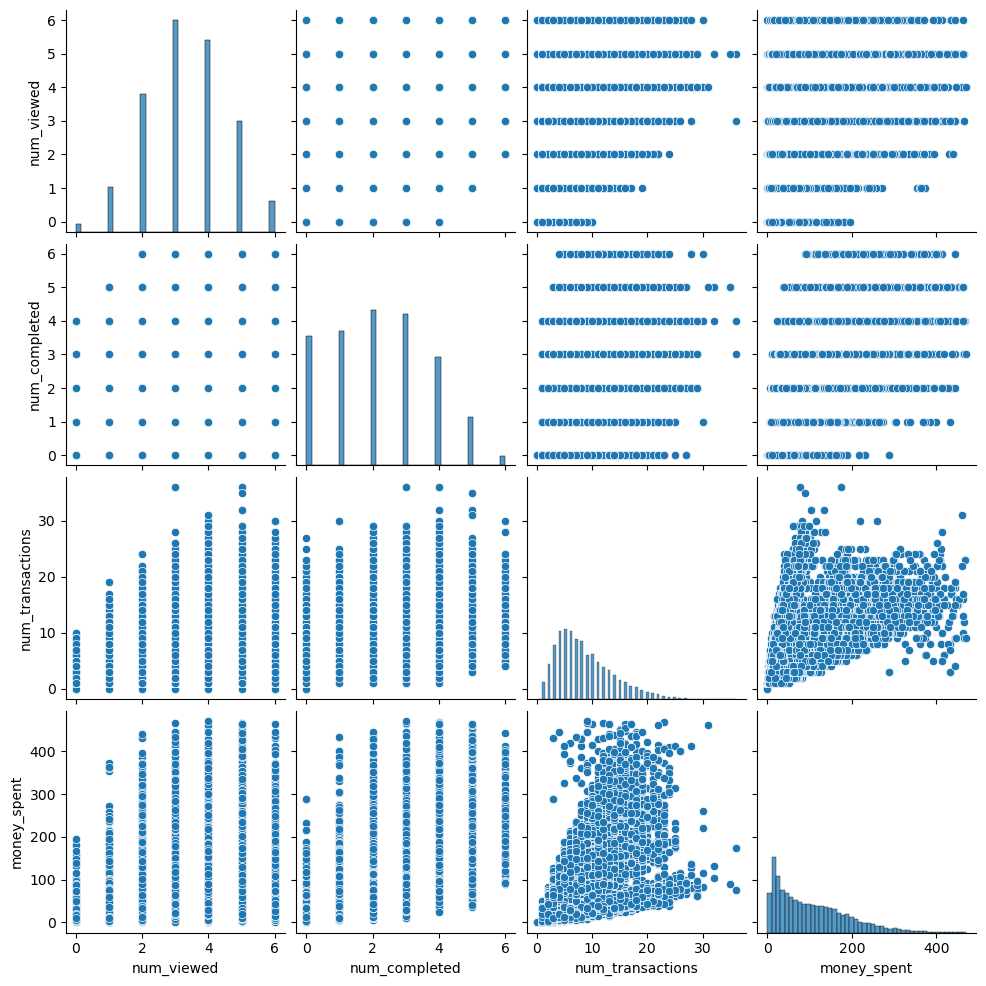

In [169]:
sns.pairplot(customer)
plt.show()

## 7. K-MEANS CLUSTERING - MODELING AND EVALUATION

In [170]:
customer

,num_viewed,num_completed,num_transactions,money_spent
person,,,,
0009655768c64bdeb2e877511632db8f,4,3,8,127.60
0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86
0020ccbbb6d84e358d3414a3ff76cffd,4,3,12,154.05
003d66b6608740288d6cc97a6903f4f0,4,3,18,48.34
00426fe3ffde4c6b9cb9ad6d077a13ea,2,1,17,68.51
...,...,...,...,...
fff29fb549084123bd046dbc5ceb4faa,5,6,11,291.47
fff7576017104bcc8677a8d63322b5e1,4,3,6,29.94
fff8957ea8b240a6b5e634b6ee8eafcf,2,0,5,12.15


Feature Scaling

The features are of different order of magnitudes, therefore need to be standardized.
Used Standard Scaler to scale the data.

In [171]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [172]:
cust_scaled=sc.fit_transform(customer)

In [173]:
cust_scaled

array([[ 0.50670179,  0.5048296 , -0.10017385,  0.25084712],
       [-0.27348826,  0.5048296 , -0.10017385,  1.05926133],
       [ 0.50670179,  0.5048296 ,  0.6874018 ,  0.55957591],
       ...,
       [-1.0536783 , -1.41920761, -0.69085558, -1.09670443],
       [ 0.50670179,  0.5048296 ,  0.6874018 , -0.20168275],
       [ 2.06708188,  2.42886682,  1.27808354,  1.4002053 ]])

In [176]:
cust=pd.DataFrame(cust_scaled)
cust.rename(columns={0:'num_viewed',
             1:'num_completed',
             2:'num_transactions',
             3:'money_spent'},inplace=True)
cust

,num_viewed,num_completed,num_transactions,money_spent
0,0.506702,0.504830,-0.100174,0.250847
1,-0.273488,0.504830,-0.100174,1.059261
2,0.506702,0.504830,0.687402,0.559576
3,0.506702,0.504830,1.868765,-0.674289
4,-1.053678,-0.777862,1.671871,-0.438861
...,...,...,...,...
13962,1.286892,2.428867,0.490508,2.163565
13963,0.506702,0.504830,-0.493962,-0.889057
13964,-1.053678,-1.419208,-0.690856,-1.096704
13965,0.506702,0.504830,0.687402,-0.201683


In [177]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Optimal number of clusters k

In [178]:
wcss=[]
sil_score=[]
max_clusters=10

for k in range(1,max_clusters):
    km=KMeans(n_clusters=k,random_state=10)
    km.fit(cust)
    wcss.append(km.inertia_)

    if k>=2:
        labels=km.labels_
        sil_score.append(silhouette_score(cust,labels))

In [179]:
wcss

[55867.999999999956,
 34410.31644991385,
 29305.220923763096,
 24274.700602289926,
 20534.675440871317,
 17975.7927453573,
 16694.377618250735,
 15376.087275429167,
 14703.698052166674]

In [180]:
sil_score

[0.3341866622265174,
 0.30273950422045576,
 0.2632338217973969,
 0.2741278877363913,
 0.2699004911747336,
 0.2556729710099663,
 0.2464397131990706,
 0.23465499732335615]

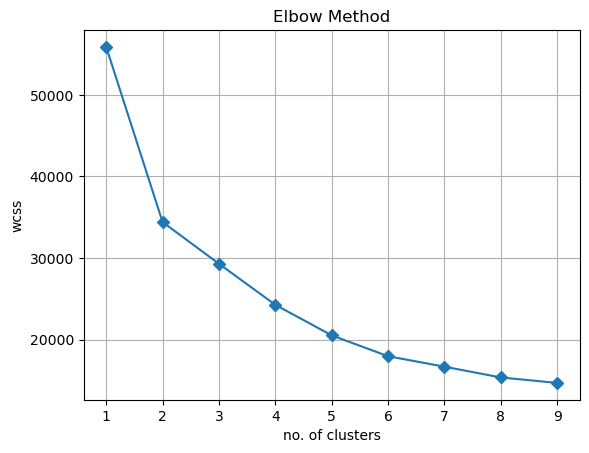

In [181]:
plt.title('Elbow Method')
plt.plot(np.arange(1,max_clusters),wcss,marker='D')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.grid()
plt.show()

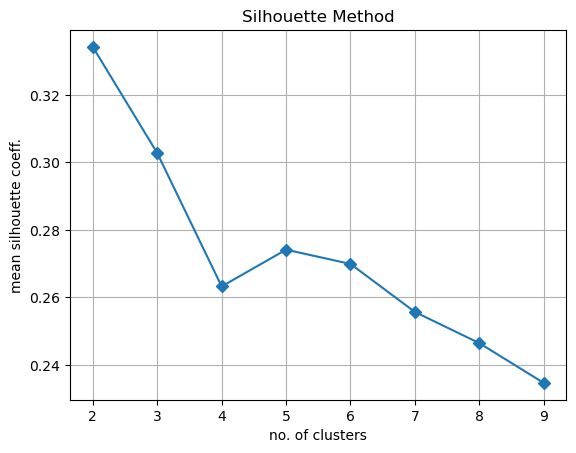

In [182]:
plt.title('Silhouette Method')
plt.plot(np.arange(2,max_clusters),sil_score,marker='D')
plt.xlabel('no. of clusters')
plt.ylabel('mean silhouette coeff.')
plt.grid()
plt.show()

In [183]:
print('Optimal number of clusters=5')

Optimal number of clusters=5


Conclusion:

- From the Elbow graph, it can be observed (not easily) that from k = 5, the within cluster sum of squares (WCSS) stops decreasing at an increasing rate.
- From the Silhouette graph, the maximum is found at k = 5 (k = 2 excluded).
- 5 segments may seem quiet a lot, but if the clusters show clear difference in features, the result should still be intepretable.

Therefore, 5 clusters will be used for the K-Means clustering analysis.

In [184]:
#k=5
kmm=KMeans(n_clusters=5,random_state=10)
kmm.fit_transform(cust)
clusters=kmm.predict(cust)
clusters

array([0, 0, 4, ..., 3, 2, 4])

In [185]:
len(clusters)

13967

In [186]:
cust.shape[0]

13967

In [187]:
customer.shape[0]

13967

In [188]:
cust['cluster_number']=clusters

In [189]:
customer['cluster_number']=clusters

In [190]:
print('Following are the cluster distributions:')
cust['cluster_number'].value_counts().sort_index()

Following are the cluster distributions:


cluster_number
0    3253
1    2553
2    1540
3    3877
4    2744
Name: count, dtype: int64

In [191]:
labels=kmm.labels_
labels

array([0, 0, 4, ..., 3, 2, 4])

In [192]:
print('Silhouette Score is:',silhouette_score(cust,labels))

Silhouette Score is: 0.455291083279472


In [193]:
cluster_info=customer.groupby('cluster_number')[['num_viewed','num_completed','num_transactions','money_spent']].mean()
cluster_info

,num_viewed,num_completed,num_transactions,money_spent
cluster_number,,,,
0,2.845681,2.932985,7.841377,142.743446
1,4.529965,1.630631,4.944771,56.056248
2,3.527273,2.035714,17.211688,72.233597
3,2.147795,0.722982,5.253547,37.151927
4,4.451895,4.105321,12.330904,225.688735


Observations:

- Got a moderate Silhouette Score of (0.455). Thus, clusters can be identified when plotted using money_spent and num_viewed.

Next, I will check the clusters visually in more details by plotting the them in separated subplots.

## 8. CLUSTERING RESULT, VISUALIZATION AND INTERPRETATION

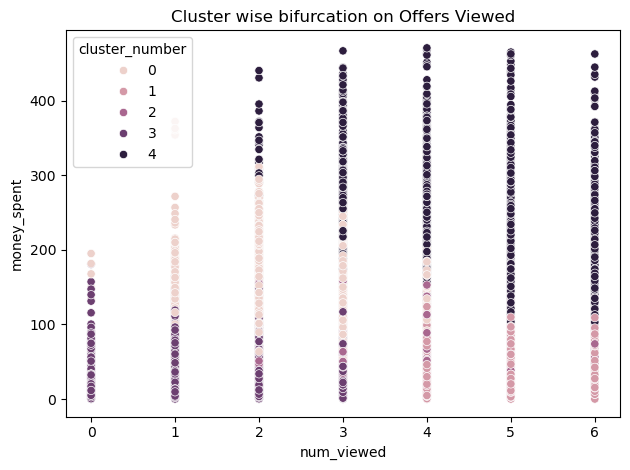

In [194]:
plt.title('Cluster wise bifurcation on Offers Viewed')
sns.scatterplot(data=customer,x='num_viewed',y='money_spent',hue='cluster_number')
plt.tight_layout()
plt.show()

In [195]:
clus0=customer[customer['cluster_number']==0]
clus1=customer[customer['cluster_number']==1]
clus2=customer[customer['cluster_number']==2]
clus3=customer[customer['cluster_number']==3]
clus4=customer[customer['cluster_number']==4]

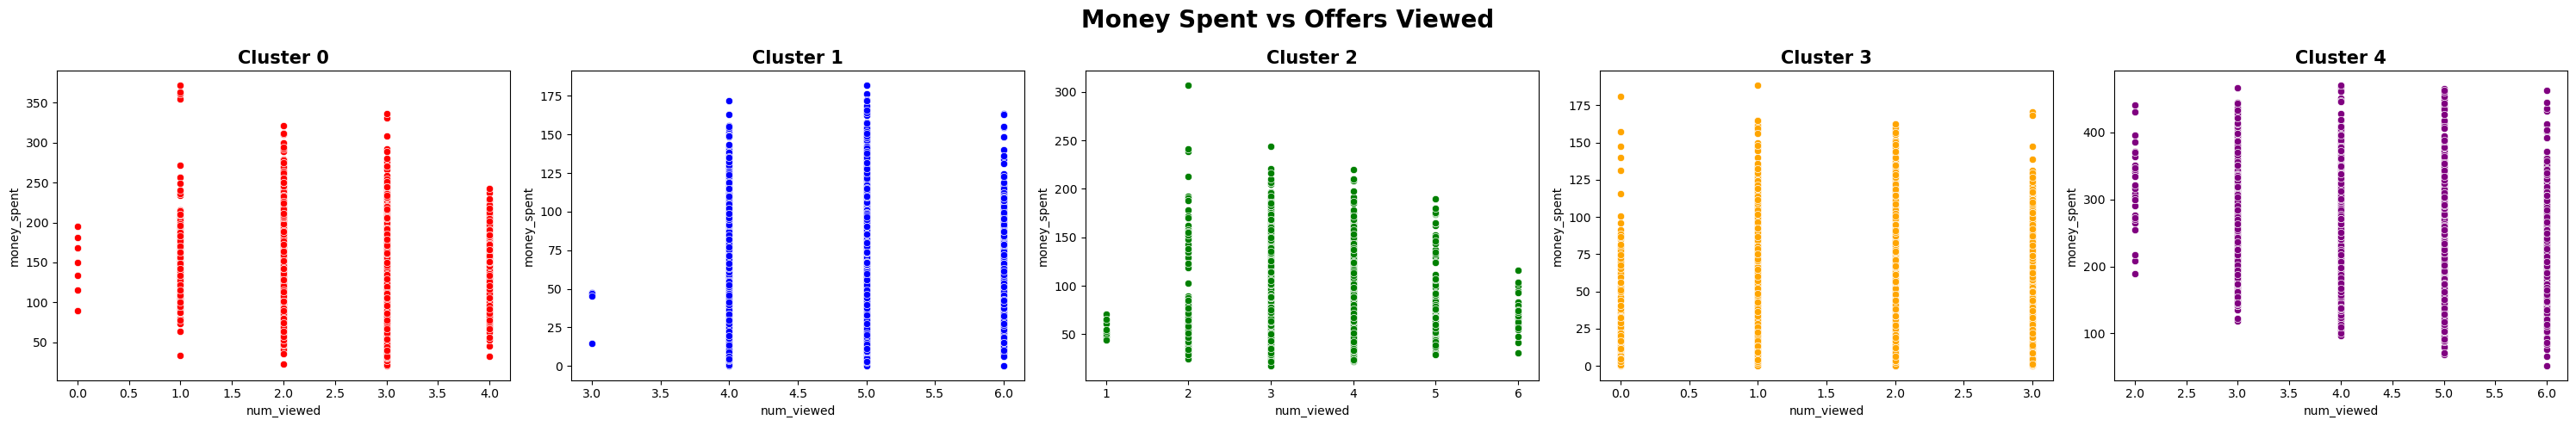

In [196]:
fig,ax=plt.subplots(1,5,figsize=(30,5))
fig.suptitle('Money Spent vs Offers Viewed',fontsize=20,fontweight='bold')
sns.scatterplot(data=clus0,x='num_viewed',y='money_spent',color='red',ax=ax[0])
sns.scatterplot(data=clus1,x='num_viewed',y='money_spent',color='blue',ax=ax[1])
sns.scatterplot(data=clus2,x='num_viewed',y='money_spent',color='green',ax=ax[2])
sns.scatterplot(data=clus3,x='num_viewed',y='money_spent',color='orange',ax=ax[3])
sns.scatterplot(data=clus4,x='num_viewed',y='money_spent',color='purple',ax=ax[4])

ax[0].set_title('Cluster 0',fontsize=15,fontweight='bold')
ax[1].set_title('Cluster 1',fontsize=15,fontweight='bold')
ax[2].set_title('Cluster 2',fontsize=15,fontweight='bold')
ax[3].set_title('Cluster 3',fontsize=15,fontweight='bold')
ax[4].set_title('Cluster 4',fontsize=15,fontweight='bold')

plt.tight_layout()
plt.show()

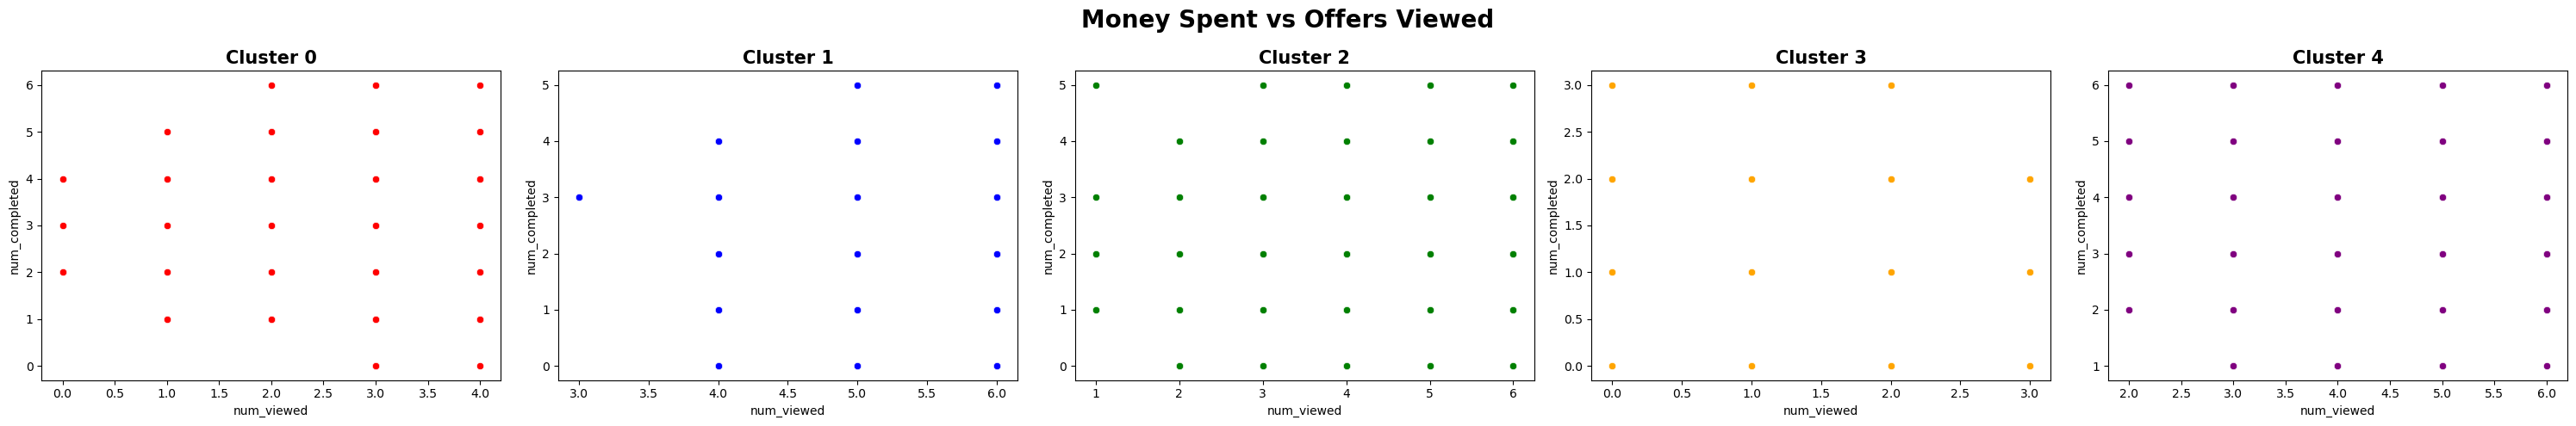

In [197]:
fig,ax=plt.subplots(1,5,figsize=(30,5))
fig.suptitle('Money Spent vs Offers Viewed',fontsize=20,fontweight='bold')
sns.scatterplot(data=clus0,x='num_viewed',y='num_completed',color='red',ax=ax[0])
sns.scatterplot(data=clus1,x='num_viewed',y='num_completed',color='blue',ax=ax[1])
sns.scatterplot(data=clus2,x='num_viewed',y='num_completed',color='green',ax=ax[2])
sns.scatterplot(data=clus3,x='num_viewed',y='num_completed',color='orange',ax=ax[3])
sns.scatterplot(data=clus4,x='num_viewed',y='num_completed',color='purple',ax=ax[4])

ax[0].set_title('Cluster 0',fontsize=15,fontweight='bold')
ax[1].set_title('Cluster 1',fontsize=15,fontweight='bold')
ax[2].set_title('Cluster 2',fontsize=15,fontweight='bold')
ax[3].set_title('Cluster 3',fontsize=15,fontweight='bold')
ax[4].set_title('Cluster 4',fontsize=15,fontweight='bold')

plt.tight_layout()
plt.show()

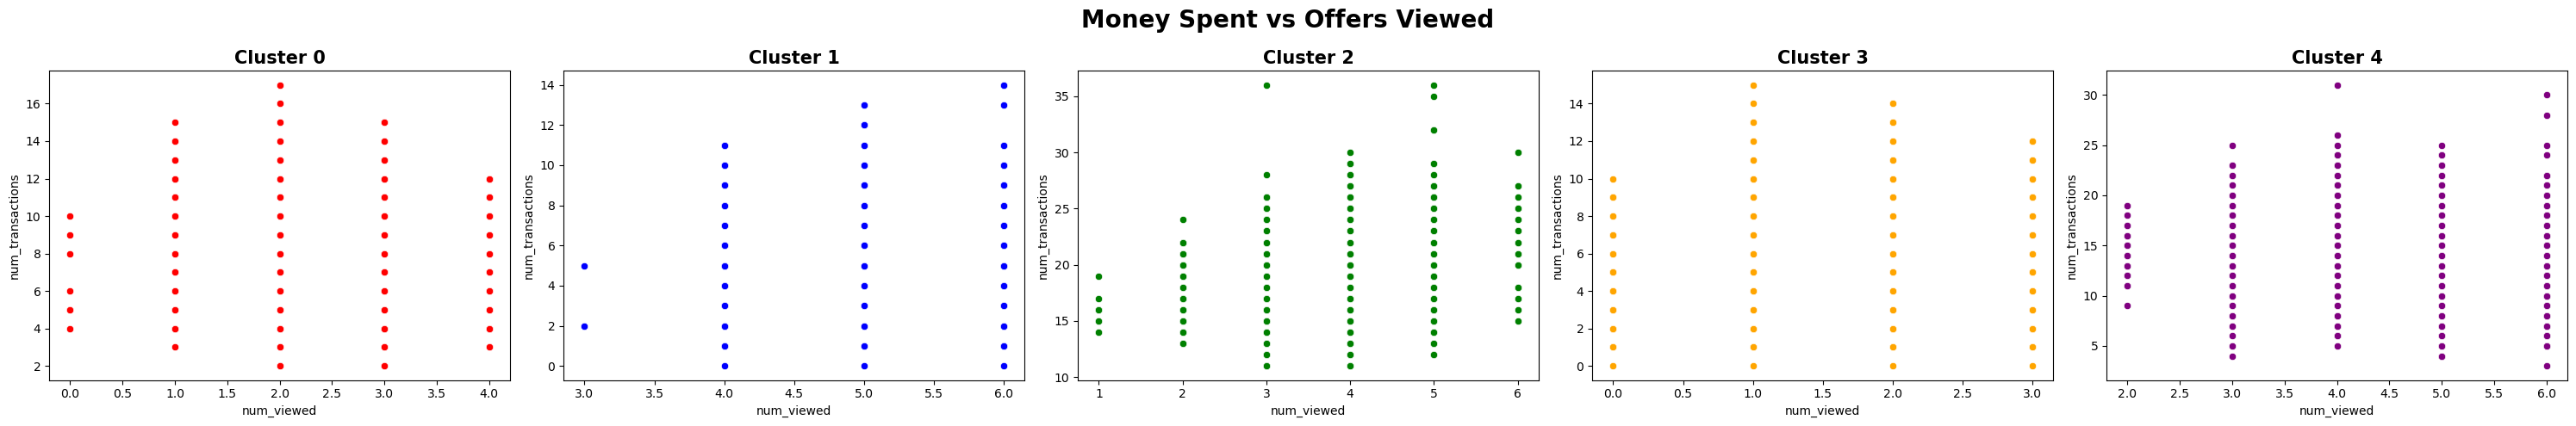

In [199]:
fig,ax=plt.subplots(1,5,figsize=(30,5))
fig.suptitle('Money Spent vs Offers Viewed',fontsize=20,fontweight='bold')
sns.scatterplot(data=clus0,x='num_viewed',y='num_transactions',color='red',ax=ax[0])
sns.scatterplot(data=clus1,x='num_viewed',y='num_transactions',color='blue',ax=ax[1])
sns.scatterplot(data=clus2,x='num_viewed',y='num_transactions',color='green',ax=ax[2])
sns.scatterplot(data=clus3,x='num_viewed',y='num_transactions',color='orange',ax=ax[3])
sns.scatterplot(data=clus4,x='num_viewed',y='num_transactions',color='purple',ax=ax[4])

ax[0].set_title('Cluster 0',fontsize=15,fontweight='bold')
ax[1].set_title('Cluster 1',fontsize=15,fontweight='bold')
ax[2].set_title('Cluster 2',fontsize=15,fontweight='bold')
ax[3].set_title('Cluster 3',fontsize=15,fontweight='bold')
ax[4].set_title('Cluster 4',fontsize=15,fontweight='bold')

plt.tight_layout()
plt.show()

Observation:
- Differences are clear from all three pair-wise features plots. This reflects the clustering is effective even the Silhouette score is not too effective.

## 9. RELATIVE PERFORMANCE OF EACH CLUSTER

In [200]:
cluster_info

,num_viewed,num_completed,num_transactions,money_spent
cluster_number,,,,
0,2.845681,2.932985,7.841377,142.743446
1,4.529965,1.630631,4.944771,56.056248
2,3.527273,2.035714,17.211688,72.233597
3,2.147795,0.722982,5.253547,37.151927
4,4.451895,4.105321,12.330904,225.688735


In [201]:
overall_avg=customer[['num_viewed','num_completed','num_transactions','money_spent']].reset_index().drop(columns=['person']).mean()
overall_avg

num_viewed            3.350541
num_completed         2.212859
num_transactions      8.508771
money_spent         106.108948
dtype: float64

In [202]:
relative_corr=((cluster_info-overall_avg)/overall_avg)
relative_corr=relative_corr.round(2)
relative_corr

,num_viewed,num_completed,num_transactions,money_spent
cluster_number,,,,
0,-0.15,0.33,-0.08,0.35
1,0.35,-0.26,-0.42,-0.47
2,0.05,-0.08,1.02,-0.32
3,-0.36,-0.67,-0.38,-0.65
4,0.33,0.86,0.45,1.13


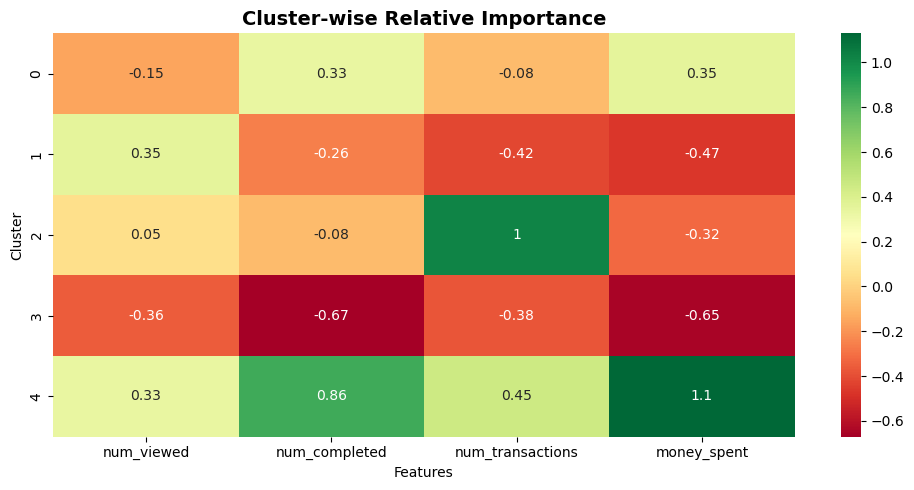

In [203]:
plt.figure(figsize=(10, len(relative_corr)))
sns.heatmap(relative_corr,annot=True,cmap='RdYlGn')
plt.title("Cluster-wise Relative Importance", fontsize=14,fontweight='bold')
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

The relative performance heatmap reflects the relative 'performance' of customers in each cluster in each field. It provides a quick overview of the characteristic of each cluster. It can be used to interpret the clustering results on its own, but I will calculate some other key metrics of each cluster that can guide business decisions more direclty.

Key Metrics of each cluster:

To better understand customer behavior of each segment and to guide segment-specific strategies, key metrics interested are:

- Frequency - Number of transactions made during the month of campaign
- Average Purchase Value - Average number of dollars spent on each transaction
- Offer Complete Rate - Offer overall completion rate
- Sensitivity to Offer - Proportion of transactions made with offers (calculated as num_completed divided by num_transactions)

In [204]:
#ranking based on correlation
ranking=relative_corr.sum(axis=1).sort_values(ascending=False).index.values
print('Cluster Ranking estimate:',ranking)

Cluster Ranking estimate: [4 2 0 1 3]


In [205]:
relative_corr.sum(axis=1).sort_values(ascending=False)

cluster_number
4    2.77
2    0.67
0    0.45
1   -0.80
3   -2.06
dtype: float64

In [206]:
rank=cluster_info.reindex(ranking)
rank

,num_viewed,num_completed,num_transactions,money_spent
cluster_number,,,,
4,4.451895,4.105321,12.330904,225.688735
2,3.527273,2.035714,17.211688,72.233597
0,2.845681,2.932985,7.841377,142.743446
1,4.529965,1.630631,4.944771,56.056248
3,2.147795,0.722982,5.253547,37.151927


In [211]:
overall_avg

num_viewed            3.350541
num_completed         2.212859
num_transactions      8.508771
money_spent         106.108948
dtype: float64

In [223]:
final_cluster=pd.DataFrame(columns=['cluster','frequency','avg_purchase_value','offer_completion_rate','offer_sensitivity'])
final_cluster['cluster']=rank.index
final_cluster['frequency']=rank.reset_index()['num_transactions'].round(2)
final_cluster['avg_purchase_value']=((rank.reset_index()['money_spent'])/(rank.reset_index()['num_transactions'])).round(2)
final_cluster['offer_completion_rate']=((rank.reset_index()['num_completed'])/(rank.reset_index()['num_viewed'])).round(2)
final_cluster['offer_sensitivity']=((rank.reset_index()['num_completed'])/(rank.reset_index()['num_transactions'])).round(2)

final_cluster.set_index(['cluster'],inplace=True)
final_cluster

,frequency,avg_purchase_value,offer_completion_rate,offer_sensitivity
cluster,,,,
4,12.33,18.30,0.92,0.33
2,17.21,4.20,0.58,0.12
0,7.84,18.20,1.03,0.37
1,4.94,11.34,0.36,0.33
3,5.25,7.07,0.34,0.14


## 10. INTERPRETATION FROM THE FINAL RANKED CLUSTER DATAFRAME

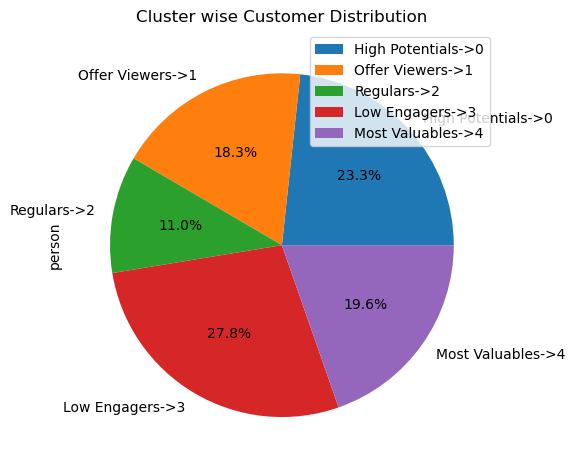

In [231]:
plt.title('Cluster wise Customer Distribution')
customer.reset_index().groupby('cluster_number')['person'].count().plot(kind='pie',autopct='%0.1f%%',labels=['High Potentials->0','Offer Viewers->1','Regulars->2','Low Engagers->3','Most Valuables->4'])
plt.legend()

plt.tight_layout()
plt.show()

# INTERPRETATION:
Note: the number of offers received (i.e. num_received) is not used in K-Means clustering. Its variance is very low, because in all clusters, customers in each cluster all received between 4-5 offers on average.

# CLUSTER 4 - MOST VALUABLE CUSTOMERS (MVC):

- These customers viewed and completed a high number of offers. This means they are highly responsive to offers.
- They did not make the most purchases (~12, about one purchase every 3 days) but spent the most money among all clusters, more than twice of the overall average during the month of campaign.
- They have the highest Average Purchase Value of 18.3 USD.
- The outlier customers (money spent was among top 2%) fit in well here (will be added back).

Recommendation: The company should try their best to keep these customers, and try to attract them to make more purchases for their high average purchase value.

# CLUSTER 2 - REGULAR CUSTOMERS:

- These customers made the most number of purchases during the month of campaign, more than one purchase every two days - they are the company's regular customers.
- The number of offers they viewed and completed are around overall average. They are not very sensitive to offers. They are willing to buy with or without offers.
- Suprisingly, their total spending over the month of campaign is slightly lower than the overall average, due to a low Average Purchase Value of only 4.2 USD.

Customization: These customers are the company's regulars. They'd purchase with or without offers. They company should keep these customers and try to increase their Average Purchase Value. Maybe by letting them try high-price products for free or at a discount price to inspire them to spend more.

# CLUSTER 0 - HIGH POTENTIALS:

- These customers had the second highest Average Purchase Value of 18.1 USD (first is 18.2 USD).
- They viewed most offers they received and completed most of them.
- They have relatively high sensitivity to offers.

Customization: These customers have high potential to become Most Valuable Customers if their purchase frequency increases. As their sensitivity and response to offer is relatively high, the company should send them more offers to make them make more purchases, which will in turn enhancing their customer stickiness.

# CLUSTER 1 - OFFER VIEWERS:

- These customers viewed the most offers (4.5).
- However, they comepleted very few of them (1.6).
- They have a moderate Average Purchase Value of 11.1 USD.
  
Customization: These customers love to click offers! Send them more offers with really good deals for a variaty of products to attract them to try. This may help them form the habbit of purchasing.

# CLUSTER 3 - LOW ENGAGERS:

- These customers showed extemely low engagement through all features, despite the fact they received a similar number of offers to customers in other clusters.
- They have a low Average Purchase Value of 7.07 USD.

Customization: Currently they did not engage much, either becuase they are loyal customers of other brands or they do not have the habbit of purchasing hot beverages outside. The company need to invest more resourse if they wish to change the current situation.

## 11. CLUSTER ANALYSIS- CUSTOMER DEMOGRAPHICS BASED ON CLUSTERS
- CLUSTER 4- MOST VALUABLE CUSTOMERS (MVC)
- CLUSTER 2- REGULAR CUSTOMERS
- CLUSTER 0- HIGH POTENTIALS
- CLUSTER 1- OFFER-VIEWERS
- CLUSTER 3- LOW ENGAGERS

Customers were separated into 5 segments based on their response to offers and purchasing behavor. Looking into the demographic profile of each segment may lead to more insights on customerized strategy for customers in each segment.

## 11.1. Preparing the dataframe for further analysis

In [237]:
profile['customer_id'].nunique()

14613

In [238]:
profile['customer_id'].unique()

array(['0610b486422d4921ae7d2bf64640c50b',
       '78afa995795e4d85b5d9ceeca43f5fef',
       'e2127556f4f64592b11af22de27a7932', ...,
       '01d26f638c274aa0b965d24cefe3183f',
       '9dc1421481194dcd9400aec7c9ae6366',
       'e4052622e5ba45a8b96b59aba68cf068'], dtype=object)

In [241]:
len(profile['customer_id'].unique())

14613

In [240]:
customer.reset_index()['person'].unique()

array(['0009655768c64bdeb2e877511632db8f',
       '0020c2b971eb4e9188eac86d93036a77',
       '0020ccbbb6d84e358d3414a3ff76cffd', ...,
       'fff8957ea8b240a6b5e634b6ee8eafcf',
       'fffad4f4828548d1b5583907f2e9906b',
       'ffff82501cea40309d5fdd7edcca4a07'], dtype=object)

In [242]:
len(customer.reset_index()['person'].unique())

13967

In [256]:
cust_ids=profile[profile['customer_id'].isin(np.setdiff1d(profile['customer_id'].unique(),customer.reset_index()['person'].unique()))]['customer_id']
cust_ids

69       13b7b2eccf664a329d83d2a238a9a11d
71       ffc6c9fbe34b4578911dcdf6745b4c74
87       6d28f18e91324d358d69d1e4b01f1ace
122      fe97aa22dd3e48c8b143116a8403dd52
168      accec36a10704e1fbaeb9b28b8bc5da8
                       ...               
14504    043b6b6be98c412d901f7f376e0548d0
14508    8a776d222f174aa089866b2725721eec
14527    29b2d42d18e24a68960fdd073d95fb48
14542    90596138fff840eea528be9100e00f09
14575    d087c473b4d247ccb0abfef59ba12b0e
Name: customer_id, Length: 646, dtype: object

These customers is either been removed from profile due to duplicacy or as outliers due to certain perspectives. So, not reconsidering them for analysis taking the else part of the dataset to continue analyzing the demographics of the customers clusters.

In [264]:
profile[profile['customer_id'].isin(cust_ids.values)].index

Index([   69,    71,    87,   122,   168,   170,   183,   188,   208,   243,
       ...
       14404, 14435, 14471, 14499, 14500, 14504, 14508, 14527, 14542, 14575],
      dtype='int64', length=646)

In [267]:
profile_df=profile.copy()

In [268]:
profile.drop(profile[profile['customer_id'].isin(cust_ids.values)].index.values,inplace=True)

In [270]:
profile

,gender,age,customer_id,income,days_member,age_group,income_group
0,0,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2915,45-54ys,> 105k
1,0,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2982,65-74ys,90-105k
2,1,68,e2127556f4f64592b11af22de27a7932,70000.0,2630,65-74ys,60-75k
3,1,65,389bc3fa690240e798340f5a15918d5c,53000.0,2706,55-64ys,45-60k
4,1,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2796,55-64ys,45-60k
...,...,...,...,...,...,...,...
14608,0,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,2591,35-44ys,45-60k
14609,1,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,2552,55-64ys,60-75k
14610,1,49,01d26f638c274aa0b965d24cefe3183f,73000.0,3085,45-54ys,60-75k
14611,0,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,3410,75-84ys,45-60k


In [304]:
merge2=customer.reset_index().merge(profile[['customer_id','age','income','gender','age_group','income_group']],left_on='person',right_on='customer_id')
merge2

,person,num_viewed,num_completed,num_transactions,money_spent,cluster_number,customer_id,age,income,gender,age_group,income_group
0,0009655768c64bdeb2e877511632db8f,4,3,8,127.60,0,0009655768c64bdeb2e877511632db8f,33,72000.0,1,25-34ys,60-75k
1,0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86,0,0020c2b971eb4e9188eac86d93036a77,59,90000.0,0,55-64ys,75-90k
2,0020ccbbb6d84e358d3414a3ff76cffd,4,3,12,154.05,4,0020ccbbb6d84e358d3414a3ff76cffd,24,60000.0,0,18-24ys,45-60k
3,003d66b6608740288d6cc97a6903f4f0,4,3,18,48.34,2,003d66b6608740288d6cc97a6903f4f0,26,73000.0,0,25-34ys,60-75k
4,00426fe3ffde4c6b9cb9ad6d077a13ea,2,1,17,68.51,2,00426fe3ffde4c6b9cb9ad6d077a13ea,19,65000.0,0,18-24ys,60-75k
...,...,...,...,...,...,...,...,...,...,...,...,...
13962,fff29fb549084123bd046dbc5ceb4faa,5,6,11,291.47,4,fff29fb549084123bd046dbc5ceb4faa,59,93000.0,0,55-64ys,90-105k
13963,fff7576017104bcc8677a8d63322b5e1,4,3,6,29.94,1,fff7576017104bcc8677a8d63322b5e1,71,73000.0,1,65-74ys,60-75k
13964,fff8957ea8b240a6b5e634b6ee8eafcf,2,0,5,12.15,3,fff8957ea8b240a6b5e634b6ee8eafcf,71,56000.0,1,65-74ys,45-60k
13965,fffad4f4828548d1b5583907f2e9906b,4,3,12,88.83,2,fffad4f4828548d1b5583907f2e9906b,34,34000.0,1,25-34ys,30-45k


In [305]:
demo=merge2.groupby('cluster_number')[['age','income']].mean().reindex(rank.reset_index()['cluster_number'])
demo.index=['Most-Valuables-> 4', 'Regulars-> 2', 'High-Potentials-> 0', 'Offer-Viewers-> 1', 'Low-Engagers-> 3']
demo=demo.round(2)
demo

,age,income
Most-Valuables-> 4,55.91,71460.64
Regulars-> 2,47.50,48832.47
High-Potentials-> 0,58.08,74764.83
Offer-Viewers-> 1,55.32,64850.76
Low-Engagers-> 3,51.93,58981.69


In [306]:
merge2.groupby('cluster_number')['gender'].value_counts().reset_index()

,cluster_number,gender,count
0,0,0,1786
1,0,1,1467
2,1,1,1574
3,1,0,979
4,2,1,1181
5,2,0,359
6,3,1,2606
7,3,0,1271
8,4,0,1444
9,4,1,1300


## 11.2 EDA to analyze Customer Demographics

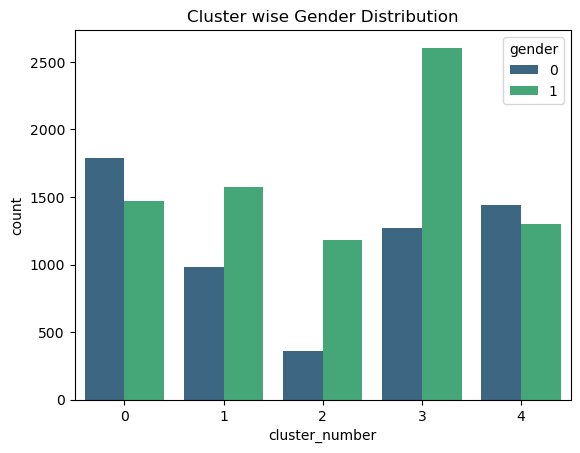

In [312]:
plt.title('Cluster wise Gender Distribution')
sns.barplot(data=merge2.groupby('cluster_number')['gender'].value_counts().reset_index(),x='cluster_number',y='count',hue='gender',palette='viridis')
plt.show()

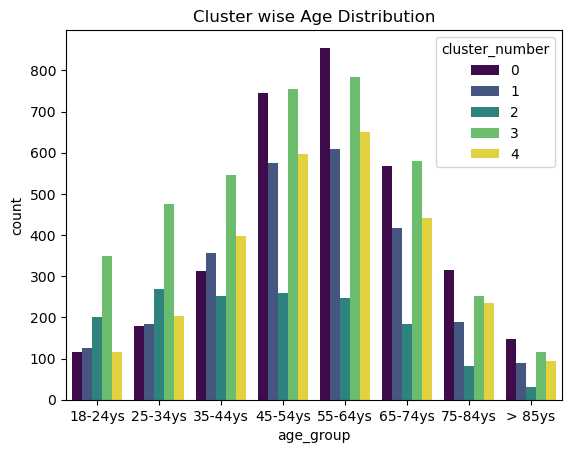

In [311]:
plt.title('Cluster wise Age Distribution')
sns.barplot(data=merge2.groupby('cluster_number')['age_group'].value_counts().reset_index(),x='age_group',y='count',hue='cluster_number',palette='viridis')
plt.show()

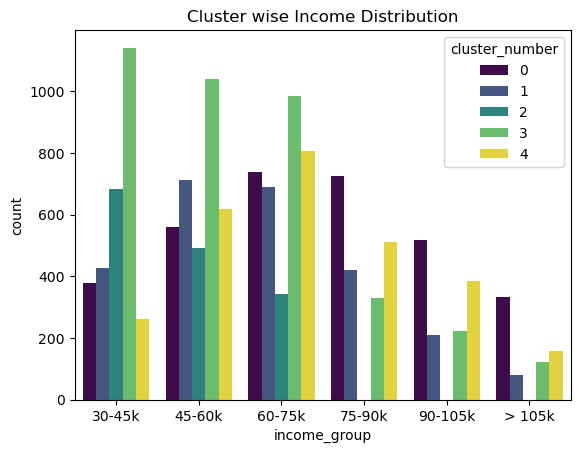

In [314]:
plt.title('Cluster wise Income Distribution')
sns.barplot(data=merge2.groupby('cluster_number')['income_group'].value_counts().reset_index(),x='income_group',y='count',hue='cluster_number',palette='viridis')
plt.show()

In [343]:
offers_df_old=offers_df.copy()

In [344]:
offers_df.drop_duplicates(inplace=True)

In [352]:
merge3=offers_df.merge(customer.reset_index()[['person','cluster_number']],left_on='customer_id',right_on='person',how='left')
merge3.dropna(inplace=True)
merge3['cluster_number']=merge3['cluster_number'].astype('int32')

In [357]:
merge3.drop(columns=['time','value_type','days_since_start','person'],inplace=True)

In [363]:
final_merge=merge3.merge(portfolio,left_on='actual_value',right_on='offer_id')

In [365]:
final_merge.shape

(139994, 10)

In [366]:
final_merge

,customer_id,event,actual_value,cluster_number,offered_reward,channels,difficulty,duration,offer_type,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,3,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5
2,389bc3fa690240e798340f5a15918d5c,offer received,f19421c1d4aa40978ebb69ca19b0e20d,1,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
3,2eeac8d8feae4a8cad5a6af0499a211d,offer received,3f207df678b143eea3cee63160fa8bed,3,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
4,aa4862eba776480b8bb9c68455b8c2e1,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
...,...,...,...,...,...,...,...,...,...,...
139989,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,4,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
139990,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,3f207df678b143eea3cee63160fa8bed,1,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
139991,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,0b1e1539f2cc45b7b9fa7c272da2e1d7,4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
139992,8431c16f8e1d440880db371a68f82dd0,offer completed,fafdcd668e3743c1bb461111dcafc2a4,1,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4


In [390]:
event=final_merge.groupby('cluster_number')['event'].value_counts()
event

cluster_number  event          
0               offer received     13570
                offer completed     9402
                offer viewed        9257
1               offer received     12829
                offer viewed       11565
                offer completed     4100
2               offer received      7208
                offer viewed        5432
                offer completed     3107
3               offer received     15053
                offer viewed        8327
                offer completed     2768
4               offer received     13993
                offer viewed       12216
                offer completed    11167
Name: count, dtype: int64

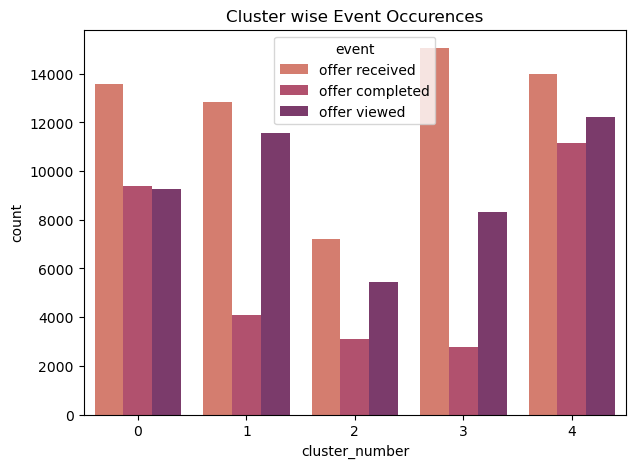

In [388]:
plt.figure(figsize=(7,5))
plt.title('Cluster wise Event Occurences')
sns.barplot(data=event.reset_index(),x='cluster_number',y='count',hue='event',palette='flare')
plt.show()

In [391]:
type=final_merge.groupby('cluster_number')['offer_type'].value_counts()
type

cluster_number  offer_type   
0               bogo             14133
                discount         13990
                informational     4106
1               bogo             11980
                discount         10969
                informational     5545
2               discount          6923
                bogo              6547
                informational     2277
3               bogo             10597
                discount         10189
                informational     5362
4               bogo             16862
                discount         16457
                informational     4057
Name: count, dtype: int64

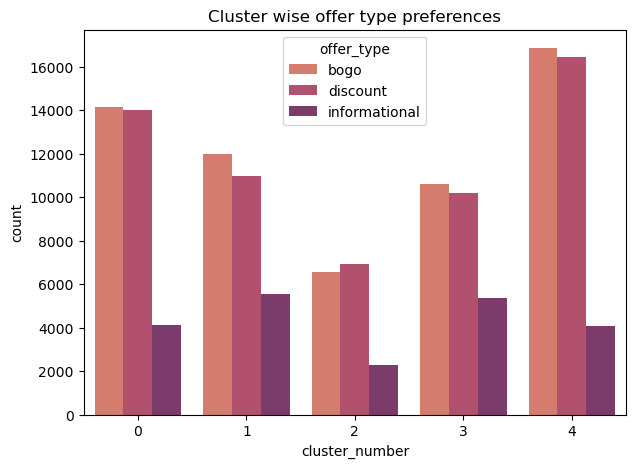

In [384]:
plt.figure(figsize=(7,5))
plt.title('Cluster wise offer type preferences')
sns.barplot(data=type.reset_index(),x='cluster_number',y='count',hue='offer_type',palette='flare')
plt.show()

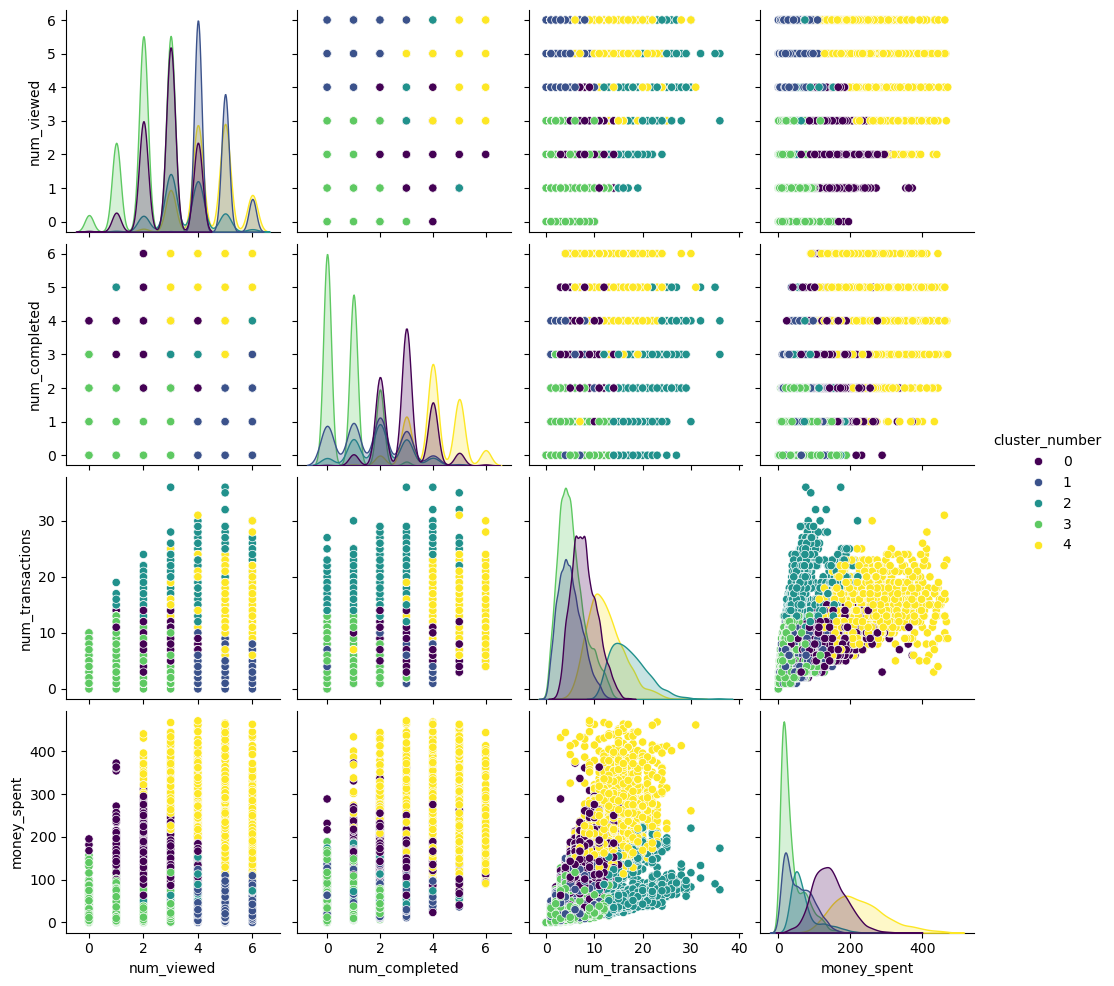

In [444]:
sns.pairplot(customer.reset_index().drop(columns='person').iloc[:-1],hue='cluster_number',palette='viridis')
plt.show()

# 11.3 Summary of Demographics of each Segment:

# CLUSTER 4 - MOST VALUABLE CUSTOMERS (MVC):
- Customers mostly between 36-75 years old.
- Having an income between 45-90k.
- Similar number of females and males.
- Have a higher completion rate (received most of the company's both bogo and discount offers) .

# CLUSTER 2 - REGULAR CUSTOMERS:
- Customers evenly distributed within 18-35 years old, having an income between 30-45k.
- Received quite less number of offers as comparerd to other clusters.
- Around only 50% of the received offers is been completed. Offer sensitivity towards discount offers is more than bogo.
- Transactions made by this cluster is still the highest.

# CLUSTER 0 - HIGH POTENTIALS:
- Between 46-75 years old.  
- Belong most to the income group of 60-90k.
- Slightly more females than male.
- Have a tendency of completing the offer once viewed. Have a high completion rate.
- Have high offer sensitivity towards both bogo and discount offers, bogo being more.

# CLUSTER 1 - OFFER VIEWERS:
- Age and Income are both rougly normaly distributed.
- Mostly belongs to the income group of 45-75k.
- Slightly more males than female.
- Viewed most of the offers received by the company but have a very low completion rate.

# CLUSTER 3 - LOW ENGAGERS:
- Mostly males on the lower half of the income spectrum.
- Age is normally distributed.
- Even view rate of these customers are quite low.